## Santander Customer Satisfaction

##### Introduction
Banco Santander/ Santander group which is a multinational financial services company based in Madrid and Santander in Spain. Santander maintains a presence in all global financial centers as the 16th largest banking institution in the world. Customer satisfaction is a key to success in banking. Unsatisfied customers don’t stick for long and they also don’t say anything about their Dissatisfaction. So, the bank needs to identify them and resolve their issues. So, it is very important for Santander group to identify unsatisfied customers to remain competitive in the banking sector.

##### Business Problem
The Santander group has millions of customers and it would be impossible for them to manually identify which customers are satisfied and which customers are unsatisfied. Santander group wants to automate this process to identify unsatisfied customers.
Santander group wants to identify unsatisfied customers early on. So, that would allow them to take necessary action to make customers happy. This would provide a huge benefit to the bank because if the customer is happy then he/she will stay with the bank for a long time. The problem is that unsatisfied customers don’t say about their dissatisfaction directly. So, based upon the customers information the machine learning model should be able to predict satisfied and unsatisfied customers. There are no low latency constraints for the problem but the predictions should happen in reasonable time.

##### Machine Learning Formulation
The problem is basically a binary classification problem. So, Santander group provided a dataset with 370 anonymous features and a TARGET feature which tells whether the customer is satisfied or unsatisfied. The TARGET feature with a value of 1 represents the unsatisfied customer and a value of 0 represents a satisfied customer. So, based on these 369 features (excluding ID) the task is to predict the probability that each customer in the test set is an unsatisfied customer. so , we need to build a binary classification model that classifies satisfied and unsatisfied customers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Case-Study-1

Mounted at /content/drive
/content/drive/My Drive/Case-Study-1


In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading train and test csv file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### What is the shape of train data?

In [4]:
train.shape

(76020, 371)

Observation:
The train data has 371 features and 76020 samples.

#### What are the data types of the features?

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Observation: There are 111 floats featurs and 260 int features.

#### How many null values are there in train?

In [6]:
train.isnull().sum().sum()

0

Observation:
There are no null values in the train data.

#### What is the shape of test data?

In [7]:
test.shape

(75818, 370)

Observation:
The test data has 370 features and 75818 samples.

#### What are the data types of the features?

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


Observation:
110 features are floats and 260 features are int.

#### How many null values are there in test?

In [9]:
test.isnull().sum().sum()

0

Observation:
There are no null values in the test data.

In [10]:
train.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
test.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


Observation:
Test data doesn't contain TARGET column.

#### What are the number of satisfied and unsatisfied customers?

In [12]:
train["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

Observation:
There are 73012 satisfied customers and 3008 unsatisfied customers. The data is mostly dominated by satisfied customers. Hence, the data is highly imbalanced.

#### what percent of customers are unsatisfied?

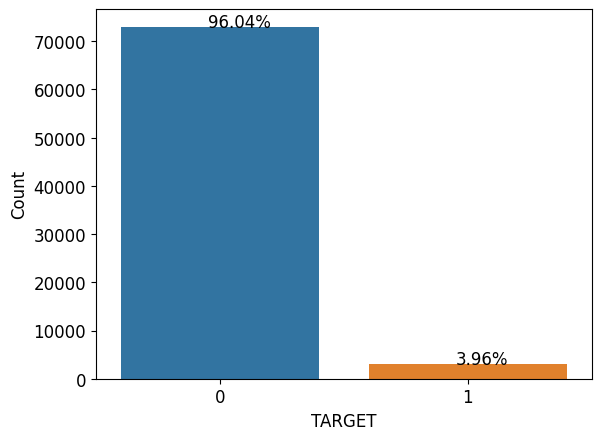

In [13]:
#Reference:
#https://stackoverflow.com/a/62053049
def without_hue(ax, feature):
    '''This function plots the bar graph with percentage annotations.'''
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


ax = sns.countplot(x='TARGET', data=train)
plt.xticks(size=12)
plt.xlabel("TARGET",size=12)
plt.yticks(size=12)
plt.ylabel("Count",size=12)
without_hue(ax,train.TARGET)
plt.show()

In [14]:
unsatisfied = train[train['TARGET'] == 1]
satisfied = train[train['TARGET'] == 0]
print(f"{round((len(unsatisfied)/len(train))*100,2)} % of the customers are unsatisfied")
print(f"{round((len(satisfied)/len(train))*100,2)} % of the customers are satisfied")

3.96 % of the customers are unsatisfied
96.04 % of the customers are satisfied


Observation:
3.96% of the customers are unsatisfied.

#### Are there any categorical features?

In [15]:
print("*"*50)
print("Features  Count")
print("*"*50)
for col in train.columns:
    print(f"{col} : {len(train[col].value_counts())}")

**************************************************
Features  Count
**************************************************
ID : 76020
var3 : 208
var15 : 100
imp_ent_var16_ult1 : 596
imp_op_var39_comer_ult1 : 7551
imp_op_var39_comer_ult3 : 9099
imp_op_var40_comer_ult1 : 293
imp_op_var40_comer_ult3 : 346
imp_op_var40_efect_ult1 : 23
imp_op_var40_efect_ult3 : 29
imp_op_var40_ult1 : 224
imp_op_var41_comer_ult1 : 7421
imp_op_var41_comer_ult3 : 8961
imp_op_var41_efect_ult1 : 331
imp_op_var41_efect_ult3 : 454
imp_op_var41_ult1 : 8032
imp_op_var39_efect_ult1 : 336
imp_op_var39_efect_ult3 : 462
imp_op_var39_ult1 : 8149
imp_sal_var16_ult1 : 66
ind_var1_0 : 2
ind_var1 : 2
ind_var2_0 : 1
ind_var2 : 1
ind_var5_0 : 2
ind_var5 : 2
ind_var6_0 : 2
ind_var6 : 2
ind_var8_0 : 2
ind_var8 : 2
ind_var12_0 : 2
ind_var12 : 2
ind_var13_0 : 2
ind_var13_corto_0 : 2
ind_var13_corto : 2
ind_var13_largo_0 : 2
ind_var13_largo : 2
ind_var13_medio_0 : 2
ind_var13_medio : 2
ind_var13 : 2
ind_var14_0 : 2
ind_var14 : 2
ind_var

KeyboardInterrupt: 

Observation:
By analyzing the unique values of the features we can see that a lot of features have unique values less than 10. Hence, there are a lot of categorical features in the train data.

In [16]:
features_train = train.drop(['ID','TARGET'],axis=1)
features_test = test.drop(['ID'],axis=1)
target_train = train['TARGET']

# Data Preprocessing for EDA

## 1. Remove Constant features

Here we are removing the constant features by simply using value_counts. The constant features have only one unique value so it is easy to remove them. These constant features does not help in classification.

In [17]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit(features_train)

VarianceThreshold(threshold=0)

Here we are selecting train features that does not have any constant feature.

In [18]:
features_train = features_train.loc[:, selector.get_support()]
features_train.shape

(76020, 335)

Here we are selecting test features that does not have any constant feature.

In [19]:
feature_list = features_train.columns
features_test = features_test[feature_list]
features_test.shape

(75818, 335)

Observation: There were 34 constant features in the train data.

## 2. Remove Quassi constant features

Here we are removing features that have very few rare values and it is mostly dominated by one value. We are using VarianceThreshold with threshold value 0.01. Quassi constant features  does not help in classification. Hence it is better to remove them.

In [20]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
selector.fit(features_train)

VarianceThreshold(threshold=0.001)

Here we are selecting features that are not quassi constant in train data.

In [21]:
features_train = features_train.loc[:, selector.get_support()]
features_train.shape

(76020, 300)

Here we are selecting features that are not quassi constant in test data.

In [22]:
feature_list = features_train.columns
features_test = features_test[feature_list]
features_test.shape

(75818, 300)

Observation:
There were 63 quasi constant features.

## 3. Remove Sparse features

Here we are removing sparse features where most of the values are zeros. The sparse features does not help much in classification. so we will remove them.

In [23]:
feature_list = []
for col in features_train.columns:
    num_zeros = len(features_train[features_train[col] == 0])
    if num_zeros/len(features_train[col]) < 0.998:
        feature_list.append(col)

Here we are selecting features that are not sparse in train data.

In [24]:
features_train = features_train[feature_list]
features_train.shape

(76020, 192)

Here we are selecting features that are not sparse in test data.

In [25]:
feature_list = features_train.columns
features_test = features_test[feature_list]
features_test.shape

(75818, 192)

Observation:
There were 113 sparse features in the train data.

## 4. Remove Highly Correlated features

Here we are removing highly correlated features because as these features does not help in classification. we will remove correlated features based on threshold. We are using pearson correlation here.

In [26]:
#Reference:
#https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb
def correlation(dataset, threshold):
    '''This function returns the names of correlated features.'''
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

Here we are selecting features that are not highly correlated in train data.

In [27]:
corr_features = correlation(features_train, 0.98)
features_train = features_train.drop(corr_features,axis=1)
features_train.shape

(76020, 144)

Here we are selecting features that are not highly correlated in test data.

In [28]:
feature_list = features_train.columns
features_test = features_test[feature_list]
features_test.shape

(75818, 144)

Observation:
There were 26 highly correlated features in the train data.

## 5. Duplicate rows with different TARGET value

In [29]:
duplicate_features = train[train.duplicated(subset=features_train.columns,keep=False)]
duplicate_features.shape

(5900, 371)

In [30]:
features_dup = duplicate_features.drop(['ID'],axis=1)
same_label = duplicate_features[duplicate_features.duplicated(subset=features_dup.columns,keep=False)]
same_label.shape

(5791, 371)

In [31]:
final_df = duplicate_features[~duplicate_features.index.isin(same_label.index)]
final_df.shape

(109, 371)

In [32]:
features_train.drop(final_df.index,inplace=True)
target_train.drop(final_df.index,inplace=True)
features_train.shape,target_train.shape

((75911, 144), (75911,))

In [33]:
final_df = final_df[features_train.columns]
final_df.shape

(109, 144)

In [34]:
X = features_train
y = target_train

In [ ]:
features_train['TARGET'] = target_train

In [ ]:
features_train = pd.concat([features_train,final_df])

In [ ]:
target_train = features_train['TARGET']
features_train = features_train.drop(['TARGET'],axis=1)

In [38]:
features_train.shape,target_train.shape

((75911, 144), (75911,))

# Exploratory Data Analysis

##### There are 133 features (excluding ID and TARGET) in the train data and analyzing all of them would be very tedious. So, instead of analyzing all the 133 features. I am going to analyze only important features. To find out important features, i am using various feature selection techniques and analyzing top 3 features from each method.

## 1. Univariate feature selection

### a) SelectKBest using mutual_info_classif score funtion

Here we are using SelectKBest method with mutual_info_classif score function to select top 10 features that are important in determining TARGET value. mutual_info_classif uses mutual information betweeen two random variables, which is the measure of dependency between the variables. Higher value means higher dependency and zero value means the variables are independent.

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
features = train.drop(["ID","TARGET"],axis=1)
target = train["TARGET"]
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(features,target)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
Scores = pd.concat([columns,scores],axis=1)
Scores.columns = ['Features','Score']  
print(Scores.nlargest(10,'Score'))

                     Features     Score
29                  ind_var30  0.017705
53                  num_var30  0.017412
60                  num_var42  0.016807
95        num_meses_var5_ult3  0.015443
34                   num_var4  0.014879
12                   ind_var5  0.014879
11                 ind_var5_0  0.014759
35                 num_var5_0  0.014487
32                ind_var39_0  0.012715
100  num_meses_var39_vig_ult3  0.012695


Observation:

After using SelectKBest method with mutual_info_classif score function we got ind_var30, num_var30 and num_var42 as top 3 features with highest scores. So, we will do data analysis on  these features.

### 1. ind_var30 feature

First, we see the number of unique values in the ind_var30 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train['ind_var30'].value_counts()

1    53581
0    17499
Name: ind_var30, dtype: int64

Observation:

So, ind_var30 feature has only two values 0 and 1. Hence, it is a categorical feature. The number of 1's are greater than number of 0's in the feature.

As the feature is categorical, we will plot histogram to futher analyze the feature.

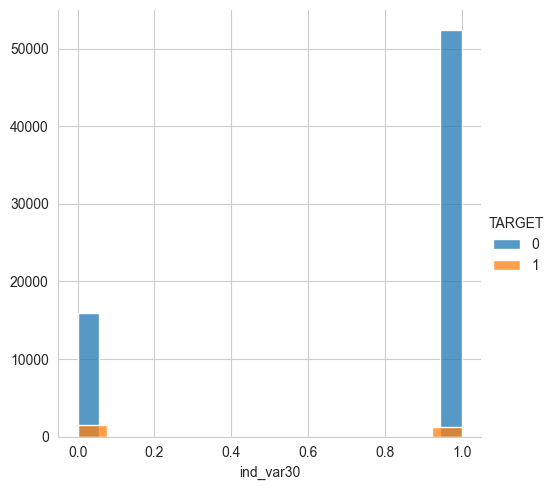

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.histplot, "ind_var30") \
   .add_legend();
plt.show();

Observation:

The histogram shows that with ind_var30 value as 0 there are more unsatisfied cutomers compared to ind_var30 value as 1. With ind_var30 value as 1 there are a lot of satisfied customers compared to ind_var30 value as 0.

Let's further analyze these number of satisfied and unsatisfied customers w.r.t ind_var30 feature.

In [ ]:
train[train['ind_var30']==0]['TARGET'].value_counts()

0    15993
1     1506
Name: TARGET, dtype: int64

In [ ]:
train[train['ind_var30']==1]['TARGET'].value_counts()

0    52375
1     1206
Name: TARGET, dtype: int64

Observation:

We can see that with ind_var30 value as 0 there are 18524 satisfied customers whereas with ind_var30 values as 1 there are 54488 satisfied customers. we can also see that with ind_var30 value as 0 there are 1786 unsatisfied customers whereas with ind_var30 value as 1 there are 1222 unsatisfied customers which is less. So, based upon above analysis we can say that with ind_var30 value as 1 there are more satisfied customers and less unsatisfied customers.


Let's further analyse the feature using percentage.

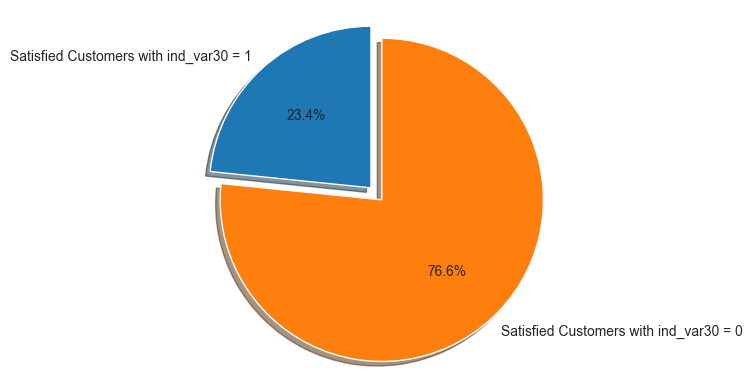

In [ ]:
labels = 'Satisfied Customers with ind_var30 = 1', 'Satisfied Customers with ind_var30 = 0'
sizes = [train[train['ind_var30']==0]['TARGET'].value_counts()[0],train[train['ind_var30']==1]['TARGET'].value_counts()[0]]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


Observation:

So from above pie chart we can clearly see that, 76.6% of all the satisfied customers have ind_var30 value equal to 0 and 23.4% of all the satisfied customers have ind_var30 value equal to 1.

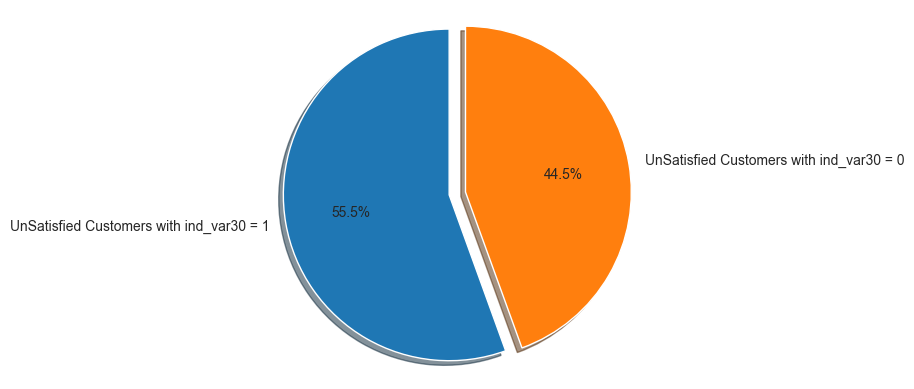

In [ ]:
labels = 'UnSatisfied Customers with ind_var30 = 1', 'UnSatisfied Customers with ind_var30 = 0'
sizes = [train[train['ind_var30']==0]['TARGET'].value_counts()[1],train[train['ind_var30']==1]['TARGET'].value_counts()[1]]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


Observation:

So from above pie chart we can say that with ind_var30 value equal to 1, there are more unsatisfied cutomers compared to ind_var30 equal to 0. 55.5% of the total unsatisfied customers have ind_var30 value equal to 1 and 44.5% of the total unsatisfied cutomers have ind_var30 value equal to 0.

Conclusion:

After analyzing the ind_var30 feature, we saw that most of the values are 1 and from histogram we can see that there are there is overlap between satisfied and unsatisfied customers for both ind_var30 value 1 and 0.From pie chart we also saw that there are decent number of unsatisfied customers with value 0. So, we cannot use ind_var30 equal to 0 to seperate satisfied and unsatisfied customers. 

### 2. num_var30 feature

First, we see the number of unique values in the num_var30 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train['num_var30'].value_counts()

3     49323
0     17499
6      3901
9       319
12       28
15        7
18        1
33        1
21        1
Name: num_var30, dtype: int64

Observation:

So, this feature is a categorical feature and the values that are frequently occuring are 3,0,6 and 9. All the values are multiples of 3.

As the feature is categorical, so we will plot histogram to further analyze it.

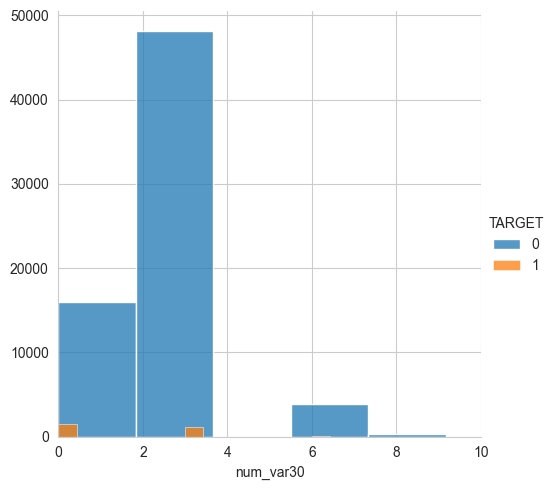

In [ ]:
sns.set_style("whitegrid")
plot = sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.histplot, "num_var30") \
   .add_legend();
plot.set(xlim=(0,10))
plt.show();

Observation:

From above histogram we can see that almost all unsatisfied customers have num_var30 value less than 4. However, there are very small number of unsatisfied customers with num_var30 value as 6 but it is not clearly visible. so we need to further analyze it.

In [ ]:
train[train['TARGET'] == 1]['num_var30'].value_counts()

0    1506
3    1163
6      41
9       2
Name: num_var30, dtype: int64

Observation:

we can clearly see that almost all unsatisfied customers have num_var30 value less than 6. 

In [ ]:
train[train['TARGET'] == 0]['num_var30'].value_counts()

3     48160
0     15993
6      3860
9       317
12       28
15        7
18        1
33        1
21        1
Name: num_var30, dtype: int64

Observation:

satisfied customers have all the unique values of num_var30 but satisfied customers mostly have num_var30 value among 3,0 and 6.

Let's further analyze using box plot.

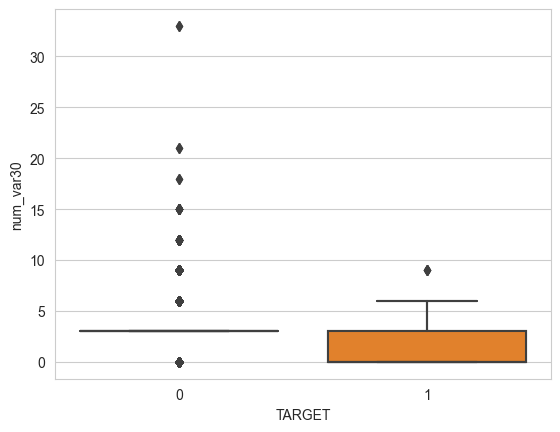

In [ ]:
ax = sns.boxplot(x="TARGET", y="num_var30", data=train)
plt.show()

Observation:

Satisfied customers are mostly centred around num_var30 value as 3 and unsatisfied customers are mostly centred around num_var30 value as 0 and 3.

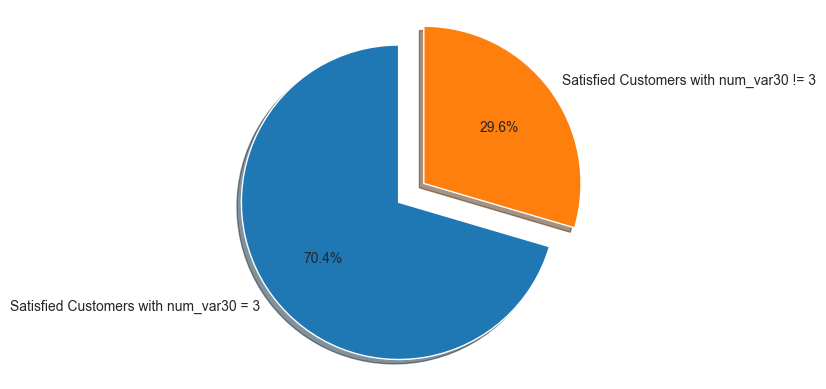

In [ ]:
plt.close()
labels = 'Satisfied Customers with num_var30 = 3', 'Satisfied Customers with num_var30 != 3'
sizes = [train[train['TARGET'] == 0]['num_var30'].value_counts()[3],(train[train['TARGET'] == 0]['num_var30'].value_counts()[0]+train[train['TARGET'] == 0]['num_var30'].value_counts()[6]+train[train['TARGET'] == 0]['num_var30'].value_counts()[9]+train[train['TARGET'] == 0]['num_var30'].value_counts()[12]+train[train['TARGET'] == 0]['num_var30'].value_counts()[15]+train[train['TARGET'] == 0]['num_var30'].value_counts()[18]+train[train['TARGET'] == 0]['num_var30'].value_counts()[33]+train[train['TARGET'] == 0]['num_var30'].value_counts()[21])]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

70.4% of all the satisfied customers have num_var30 value equal to 3 and 29.6% of all the satisfied customers have num_var30 value not equal to 3. clearly with num_var30 equal to 3 customers are satisfied. hence num_var30 is related to customer satisfaction.

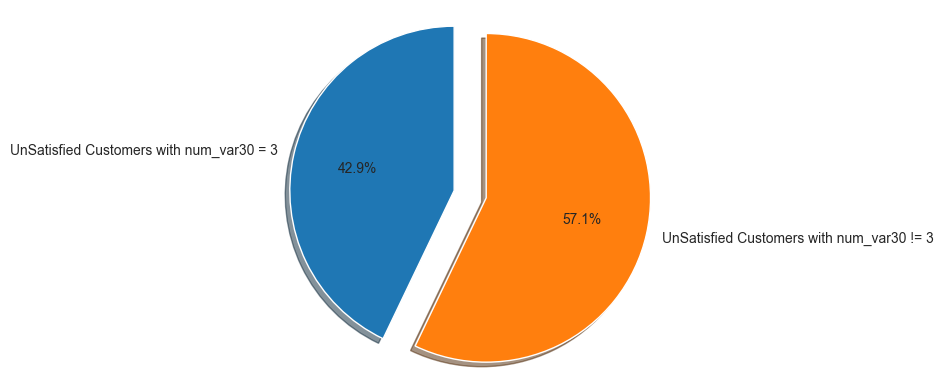

In [ ]:
plt.close()
labels = 'UnSatisfied Customers with num_var30 = 3', 'UnSatisfied Customers with num_var30 != 3'
sizes = [train[train['TARGET'] == 1]['num_var30'].value_counts()[3],(train[train['TARGET'] == 1]['num_var30'].value_counts()[0]+train[train['TARGET'] == 1]['num_var30'].value_counts()[6]+train[train['TARGET'] == 1]['num_var30'].value_counts()[9])]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

42.9% of all the unsatisfied customers have num_var30 value equal to 3 and 57.1% of all the unsatisfied customers have num_var30 value not equal to 3. 

Conclusion:

After analyzing num_var30 we can see that most customers have num_var30 value as 3. By analyzing the percentage of the satisfied and unsatisfied customers have num_var30 value as 3, we cannot draw any conclusion whether num_var30 value affect the customers satisfaction because there are 42.9% of unsatisfied customers which has num_var30 value. 

### 3. num_var42 feature

First, we see the number of unique values in the num_var42 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train['num_var42'].value_counts()

3     49935
0     19097
6      2012
9        31
12        3
15        1
18        1
Name: num_var42, dtype: int64

Observation:

This feature is a categorical feature and the values that are frequently occuring are 3,0 and 6. Here also all the values are multiples of 3.

As the feature is categorical, so we will plot histogram to further analyze it.

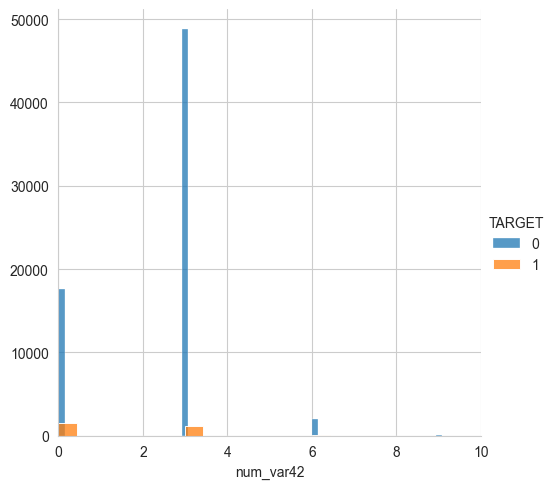

In [ ]:
sns.set_style("whitegrid")
plot = sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.histplot, "num_var42") \
   .add_legend();
plot.set(xlim=(0,10))
plt.show();

Observation:

Most of the unsatisfied customers have num_var43 value as 0 or 3 and Most satisfied customers also have num_var42 value as 0 or 3.  

Let's further analyze the feature with some exact numbers inplace of histogram.

In [ ]:
train[train['TARGET']==0]['num_var42'].value_counts()

3     48784
0     17562
6      1987
9        30
12        3
15        1
18        1
Name: num_var42, dtype: int64

Observation:

Almost all the satisfied customers have num_var42 values less than 6. satisfied customers have all the unique values of the num_var42 feature.

In [ ]:
train[train['TARGET']==1]['num_var42'].value_counts()

0    1535
3    1151
6      25
9       1
Name: num_var42, dtype: int64

Observation:

Most of the unsatisfied customers have num_var42 value as 0 or 3. Highest number of unstisfied customers have num_var42 value as 0. 

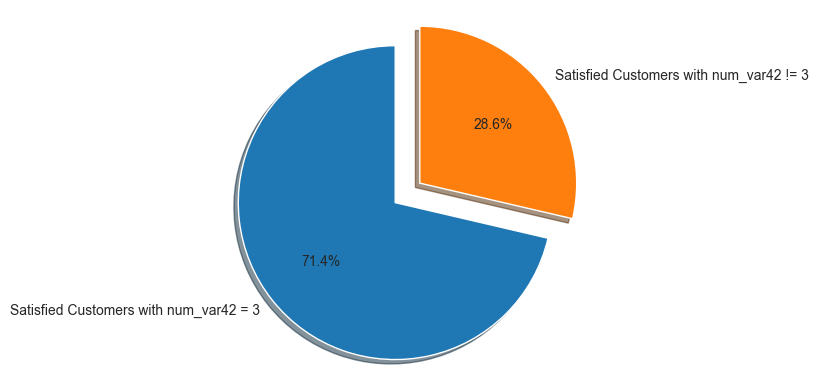

In [ ]:
plt.close()
labels = 'Satisfied Customers with num_var42 = 3', 'Satisfied Customers with num_var42 != 3'
sizes = [train[train['TARGET'] == 0]['num_var42'].value_counts()[3],(train[train['TARGET'] == 0]['num_var42'].value_counts()[0]+train[train['TARGET'] == 0]['num_var42'].value_counts()[6]+train[train['TARGET'] == 0]['num_var42'].value_counts()[9]+train[train['TARGET'] == 0]['num_var42'].value_counts()[12]+train[train['TARGET'] == 0]['num_var42'].value_counts()[15]+train[train['TARGET'] == 0]['num_var42'].value_counts()[18])]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

71.4% of all the satisfied customers have num_var42 value equal to 3 and 28.9% of all the satisfied customers have num_var42 value not equal to 3. This somewhat similar to previous feature num_var30.

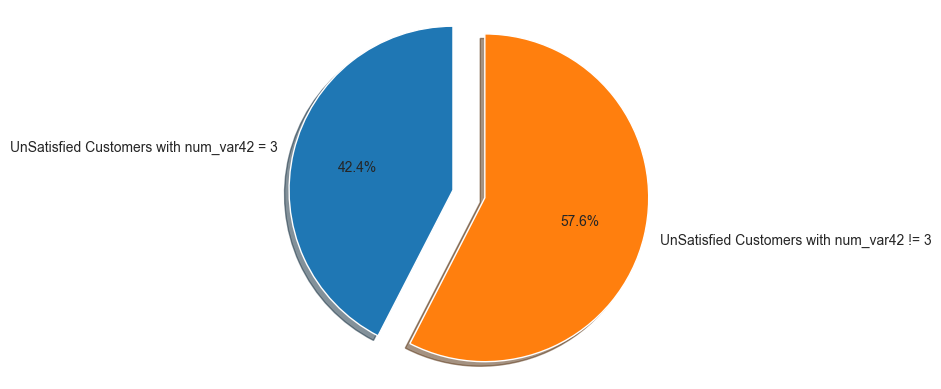

In [ ]:
plt.close()
labels = 'UnSatisfied Customers with num_var42 = 3', 'UnSatisfied Customers with num_var42 != 3'
sizes = [train[train['TARGET'] == 1]['num_var42'].value_counts()[3],(train[train['TARGET'] == 1]['num_var42'].value_counts()[0]+train[train['TARGET'] == 1]['num_var42'].value_counts()[6]+train[train['TARGET'] == 1]['num_var42'].value_counts()[9])]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

42.4% of all the unsatisfied customers have num_var42 value equal to 3 and 57.6% of all the unsatisfied customers have num_var42 value not equal to 3. This is also similar to num_var30 feature.

Conclusion:
    
In the above analysis we can see that for most of the satisfied customers the num_var42 is 3 and for 42.4% of the unsatisfied customers the num_var42 is 3. The number of unsatisfied customers with num_var42 value as 3 are clearly less than unsatisfied customers with num_var42 value as not equal to 3 but num_var42 equal to 3 is not sufficient enough to seperate unsatisfied and satisfied customers because there are decent amount number of unsatisfied cutomers with num_var42 equal to 3.

One more thing that i observed from above analysis is num_var30 and num_var42 both have values as multiple of 3's. Let's further analyze features starting with num_var.

In [ ]:
num_var_list = []
for col in train.columns:
    if "num_var" in str(col):
        num_var_list.append(col)
for val in num_var_list:
    print(train[val].value_counts())

1    36018
0    16717
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64
3     67424
0      3168
6       479
9         7
15        2
Name: num_var5_0, dtype: int64
0      65951
3       4950
6        174
9          3
15         1
111        1
Name: num_var12_0, dtype: int64
0     67108
3      3740
6       200
9        22
12        7
15        2
18        1
Name: num_var13_0, dtype: int64
0     70307
3       636
6       112
9        18
12        4
15        2
18        1
Name: num_var13_largo_0, dtype: int64
0     70320
3       652
6        93
9         9
12        3
15        2
18        1
Name: num_var13_largo, dtype: int64
0     67214
3      3712
6       135
9        12
12        4
15        2
18        1
Name: num_var13, dtype: int64
0      69282
3       1791
6          5
12         1
111        1
Name: num_var14_0, dtype: int64
0     70677
3       399
6         3
12        1
Name: num_var14, dtype: int64
0     69207
3      1574
6       240

Observation:

From the analysis of features starting with num_var keyword we can see that all the features have the value as multiple of 3's. This pattern that we found can be used to make a new feature which will count the number of multiples of 3. we will add this feature in feature engineering step.

### b) SelectKBest using f_classif score funtion

Here we are using SelectKBest method with f_classif score function to select top 10 features that are important in determining TARGET value. f_classif computes the ANOVA F-value for the provided sample.

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
features = train.drop(["ID","TARGET"],axis=1)
target = train["TARGET"]
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(10,'Score')) 

               Features        Score
29            ind_var30  1482.060815
95  num_meses_var5_ult3  1452.110946
53            num_var30  1253.262006
60            num_var42  1186.731878
12             ind_var5  1178.189936
73                var36   668.813837
1                 var15   659.533819
34             num_var4   372.874420
54            num_var35   340.729244
13           ind_var8_0   179.948824


Observation:

After using SelectKBest method with f_classif score function we got ind_var30, num_meses_var5_ult3 and num_var30 as top 3 features with highest scores. We have already analyzed ind_var30 and num_var30.so, we will analyze only num_meses_var5_ult3 feature.

### 1. num_meses_var5_ult3 feature

First, we see the number of unique values in the num_meses_var5_ult3 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train["num_meses_var5_ult3"].value_counts()

3    40839
0    17732
2     9241
1     3268
Name: num_meses_var5_ult3, dtype: int64

Observation:

num_meses_var5_ult3 feature is a categorical feature. The highest frequency is of value 3 followed by value 0.

As, the feature is a categorical feature so we will plot histogram to further analyze the feature.

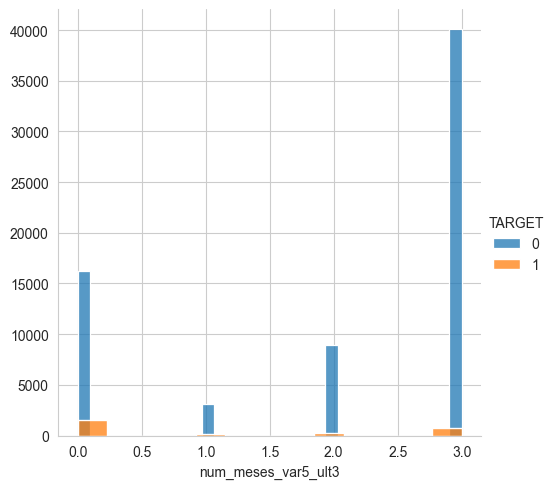

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.histplot, "num_meses_var5_ult3") \
   .add_legend();
plt.show();

Observation:

Most values of num_meses_var5_ult3 feature have 0 or 3 values. There are more unsatisfied customers with num_meses_var5_ult3 value as 0 compared to other num_meses_var5_ult3 values. 

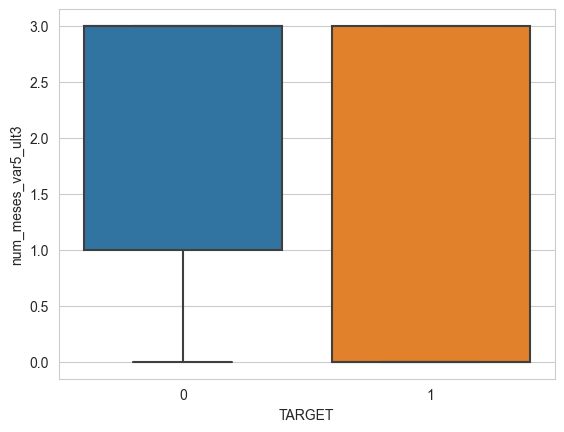

In [ ]:
ax = sns.boxplot(x="TARGET", y="num_meses_var5_ult3", data=train)
plt.show()

Observation:
    
From the above box plot we can see that for both satisfied and unsatisfied customers the num_meses_var5_ult3 values are overlapping and hence this feature is not helpful in seperating satisfied and unsatisfied customers.

Conclusion:

In num_meses_var5_ult3 feature most customers have value as 3 but after see the histogram we can see that there is an overlap between satisfied and unsatisfied customers.So we can't draw any patterns from it. So, we will leave this feature as it is.

## 2. Feature Importance using RandomForestClassifier

Here we are using Random Forest to find the important features. The feature_importances_ property can be used to retrieve the relative importance scores for each input feature.

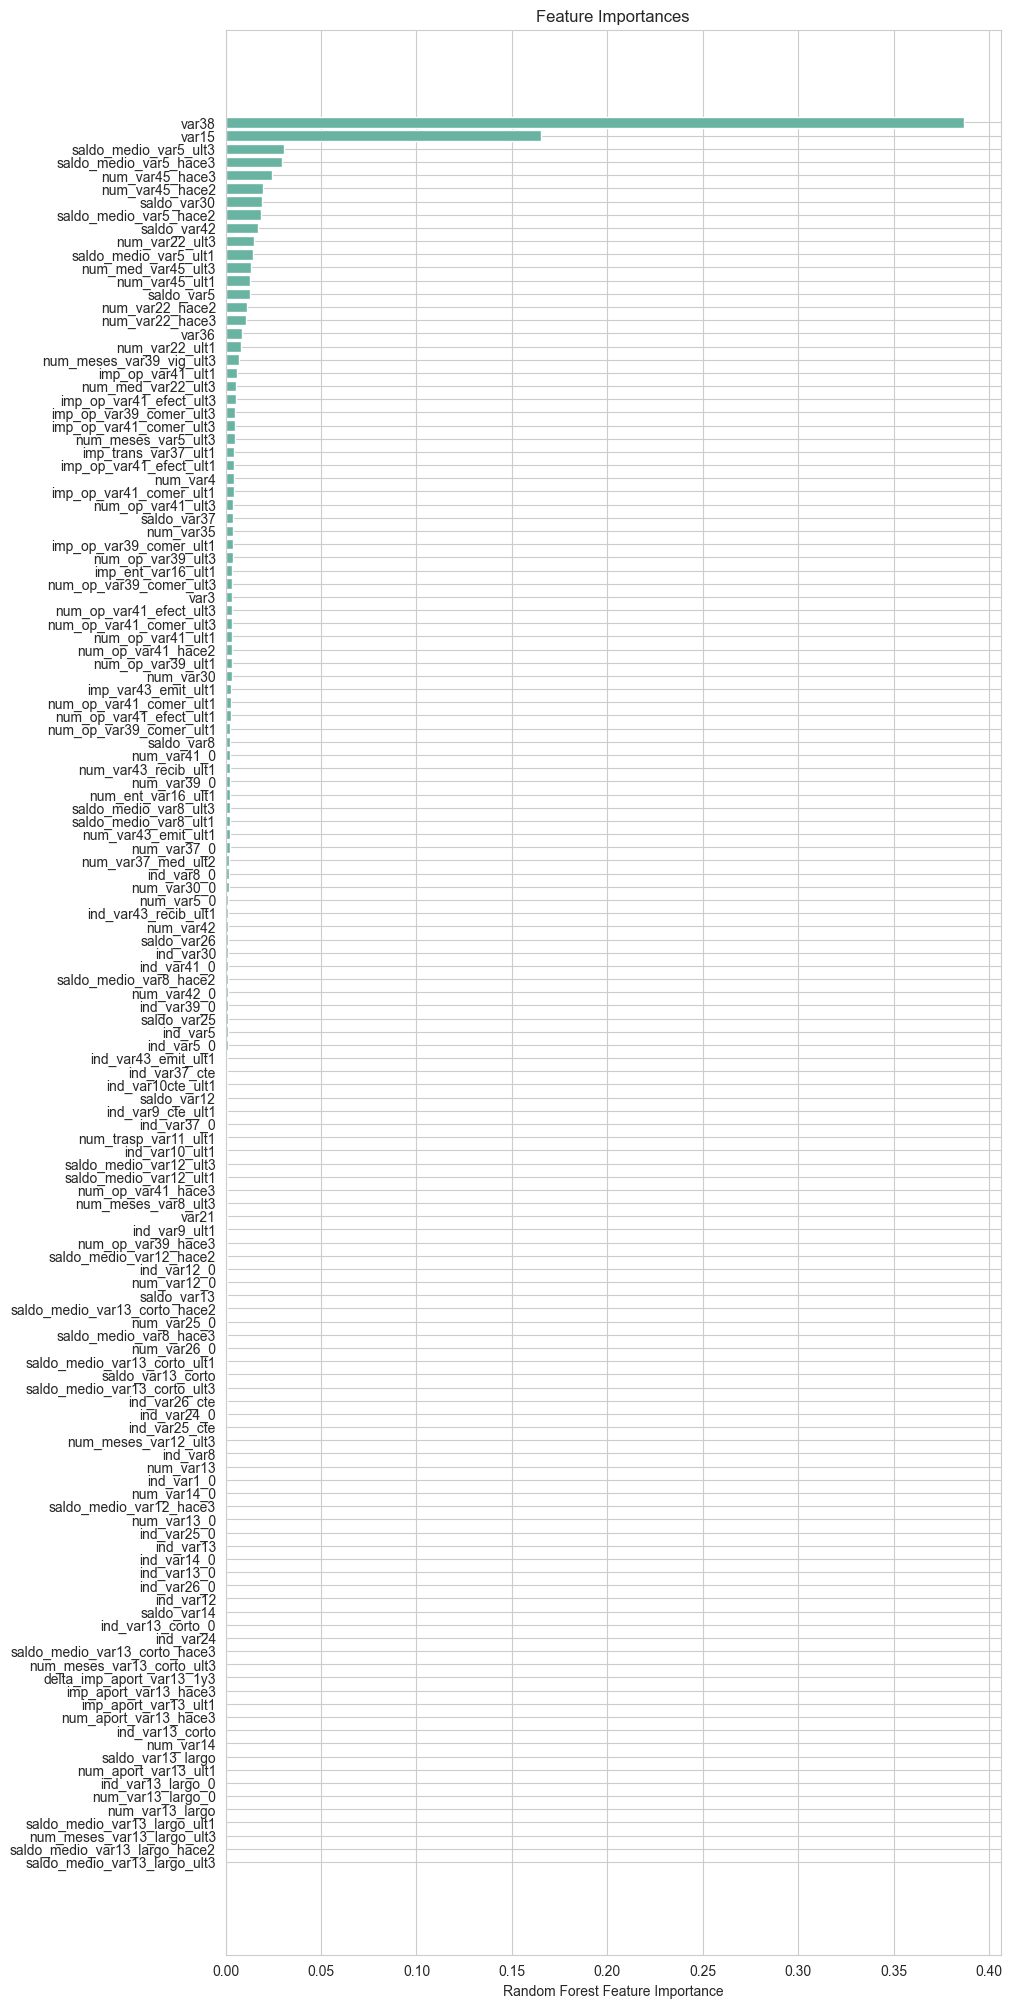

In [ ]:
#Reference:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.ensemble import RandomForestClassifier
features = train.drop(["ID","TARGET"],axis=1)
target = train["TARGET"]
col_names = features.columns
model = RandomForestClassifier()
model.fit(features, target)
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize=(10,25))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center',color='#69b3a2')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

Observation:

From the above bar chart we can see that var38 is the most important feature followed by var15. As we are going to analyze top three features based upon the feature importance calculated using random forest model. so we will analyze var38, var15 and saldo_medio_var5_ult3.

### 1. var38 feature

Various discussions on kaggle and literature survey says that this feature might be the mortgage value of the customers.so, let's analyze how the var38 value affects the customer satisfaction.

First, we will see the number of unique values in the var38 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train["var38"].value_counts()

117310.979016    9979
451931.220000      16
463625.160000      12
104563.800000      11
288997.440000      10
                 ... 
101249.580000       1
71010.540000        1
96572.550000        1
98387.970000        1
84278.160000        1
Name: var38, Length: 57736, dtype: int64

Observation:

From above value count we can see that var38 is a numerical feature and the highest frequency is for the value 117310.979016 which is 9979. 

As the feature is numerical so to further analyze the feature we will plot distribution plot.

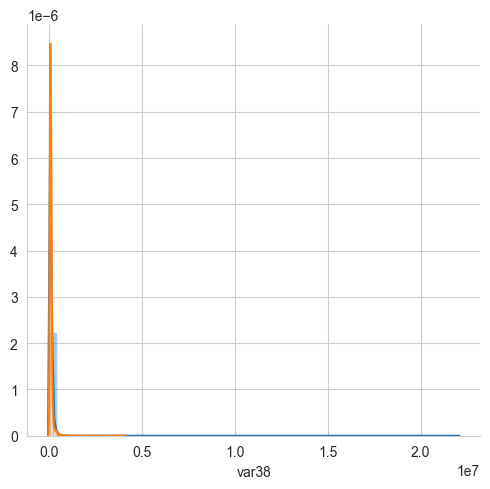

In [ ]:
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.distplot, "var38")
plt.show()

Observation:
    
The above distribution plot is very skewed and we cannot analyze from this view so we have to zoom in a little to understand the distribution.

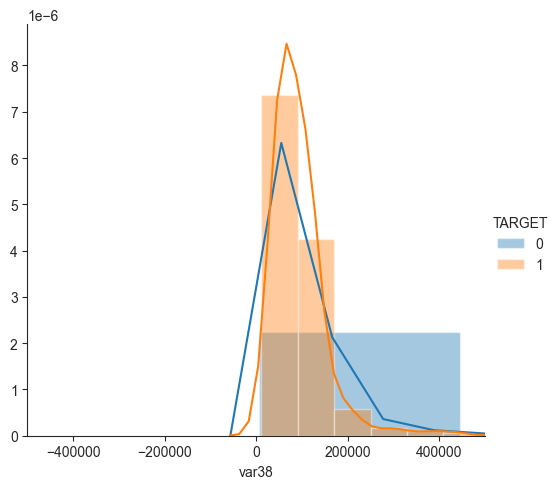

In [ ]:
plt.close()
sns.set_style("ticks")
plot = sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.distplot, "var38") \
   .add_legend();
#Reference:
#https://www.kite.com/python/answers/how-to-set-axis-limits-in-a-seaborn-lmplot-facetgrid-in-python
plot.set(xlim=(-500000,500000))
plt.show();

Observation:

At start there are more satisfied customers for var38 values in range of roughly -50000 to roughly around 30000 and then after that from var38 values in range of roughly 30000 to 150000 there are more unsatisfied customers and after 150000 again there are more unsatisfied customers. so we can say that for mortgage value between 30000 to 150000 are more unsatisfied and after 150000 mortgage value there are less unsatisfied customers compared to satisfied customers. 

As the distribution is skewed so we can use log transform to transform the distribution in more guassian like distribution.

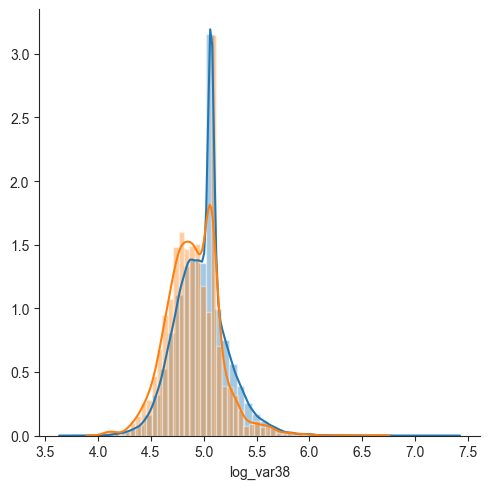

In [ ]:
train["log_var38"] = np.log10(train["var38"]+1)
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.distplot, "log_var38")
plt.show()

Observation:
    
After applying log transformation we can see that the distribution has become roughly like guassian distribution. So, we can use this log transformation in feature engineering so that it would help in the classification because most of the machine learning model perform better when the features are normallly distributed.

In [ ]:
train = train.drop(["log_var38"],axis=1)

Let's further analyze the feature using violin plot.

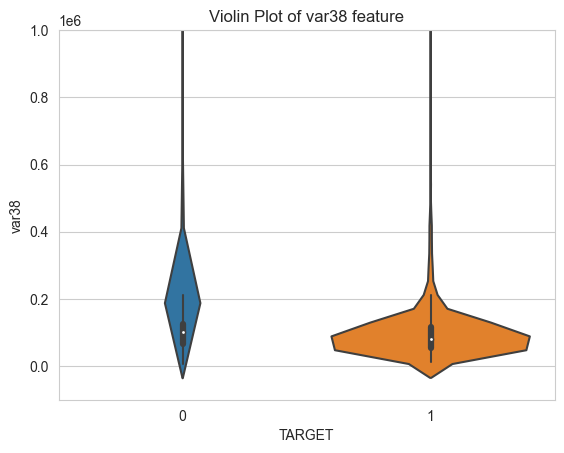

In [ ]:
sns.set_style("whitegrid")
plot = sns.violinplot(x="TARGET", y="var38", data=train, size=8)
plt.title("Violin Plot of var38 feature")
plot.set(ylim=(-100000,1000000))
plt.show()

Observation:
    
From above violin plot we can see that for unsatisfied customers most of the values are spread in the bottom in range 30000 to 150000 and for satisfied customers most of the values are spread above 150000.

So, above we were making conclusion using rough estimations. Now lets look at exact numerical values to further draw some conclusions.

In [ ]:
#Median, Percentile, Quantile, IQR, MAD
print("\nMedians for var38 feature:")
print(f"satisfied:{np.median(train[train['TARGET']==0]['var38'])}")
print(f"unsatisfied:{np.median(train[train['TARGET']==1]['var38'])}")

print("\nQuantiles for var38 feature:")
print(f"satisfied:{np.percentile(train[train['TARGET']==0]['var38'],np.arange(0, 100, 25))}")
print(f"unsatisfied:{np.percentile(train[train['TARGET']==1]['var38'],np.arange(0, 100, 25))}")

print("\n90th Percentiles for var38 feature:")
print(f"satisfied:{np.percentile(train[train['TARGET']==0]['var38'],90)}")
print(f"unsatisfied:{np.percentile(train[train['TARGET']==1]['var38'],90)}")

from statsmodels import robust
print ("\nMedian Absolute Deviation for var38 feature:")
print(f"satisfied:{robust.mad(train[train['TARGET']==0]['var38'])}")
print(f"unsatisfied:{robust.mad(train[train['TARGET']==1]['var38'])}")


Medians for var38 feature:
satisfied:100934.23499999999
unsatisfied:79991.67

Quantiles for var38 feature:
satisfied:[  5163.75    66426.8475 100934.235  123958.635 ]
unsatisfied:[ 11136.63        54969.4425      79991.67       117310.97901649]

90th Percentiles for var38 feature:
satisfied:189349.527
unsatisfied:147637.65600000002

Median Absolute Deviation for var38 feature:
satisfied:45890.2674073279
unsatisfied:46371.47560938829


Observation:

90% of the var38 values for satisfied customers is less than or equal to 189349.527 and 90% of var38 values for unsatisfied customers is less than or equal to 147637. so from our previous analysis we can see that most value for unsatisfied customers were between 30000 and 150000 which we can see here also.

Now we will further analyze the frequency of values to draw conclusions from them.

In [ ]:
train["var38"].value_counts()

117310.979016    9979
451931.220000      16
463625.160000      12
104563.800000      11
288997.440000      10
                 ... 
101249.580000       1
71010.540000        1
96572.550000        1
98387.970000        1
84278.160000        1
Name: var38, Length: 57736, dtype: int64

In [ ]:
train[train['var38']==117310.979016494]['TARGET'].value_counts()

0    9660
1     319
Name: TARGET, dtype: int64

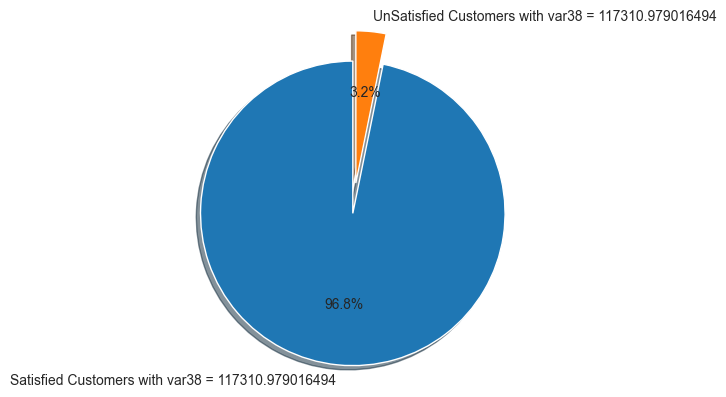

In [ ]:
plt.close()
labels = 'Satisfied Customers with var38 = 117310.979016494', 'UnSatisfied Customers with var38 = 117310.979016494'
sizes = [train[train['var38']==117310.979016494]['TARGET'].value_counts()[0],train[train['var38']==117310.979016494]['TARGET'].value_counts()[1]]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

From above pie chart we can clearly see that 96.8% of the satisfied customers have var38 value equal to 117310.979016494. so this can be used as a feature which will help in seperating satisfied and unsatisfied customers.

Conclusion:

From analysis we observed that log transformation of the var38 feature makes the distribution more like normal(not exact normal) and hence we can use it as new feature. The var38 feature with value 117310.979016494 is very much a deciding factor in customer satisfaction. So, we will also add this as feature.

### var15 feature

Various discussions on kaggle and literature survey says that this feature might be the age of the customers.So, let's analyze how the var15 value affects the customer satisfaction.

In [ ]:
train["var15"].value_counts().sort_index()

5      27
6      21
7       6
8       9
9      18
       ..
100     6
101     1
102     4
104     2
105     1
Name: var15, Length: 100, dtype: int64

Observation:

The values of the var15 features are in range of 5 to 105. so, by analyzing the range of the values we can say that this feature is age of the customers.

To further analyze the var15 feature let's plot the histogram to see how var15 affects the satisfaction of the customers.

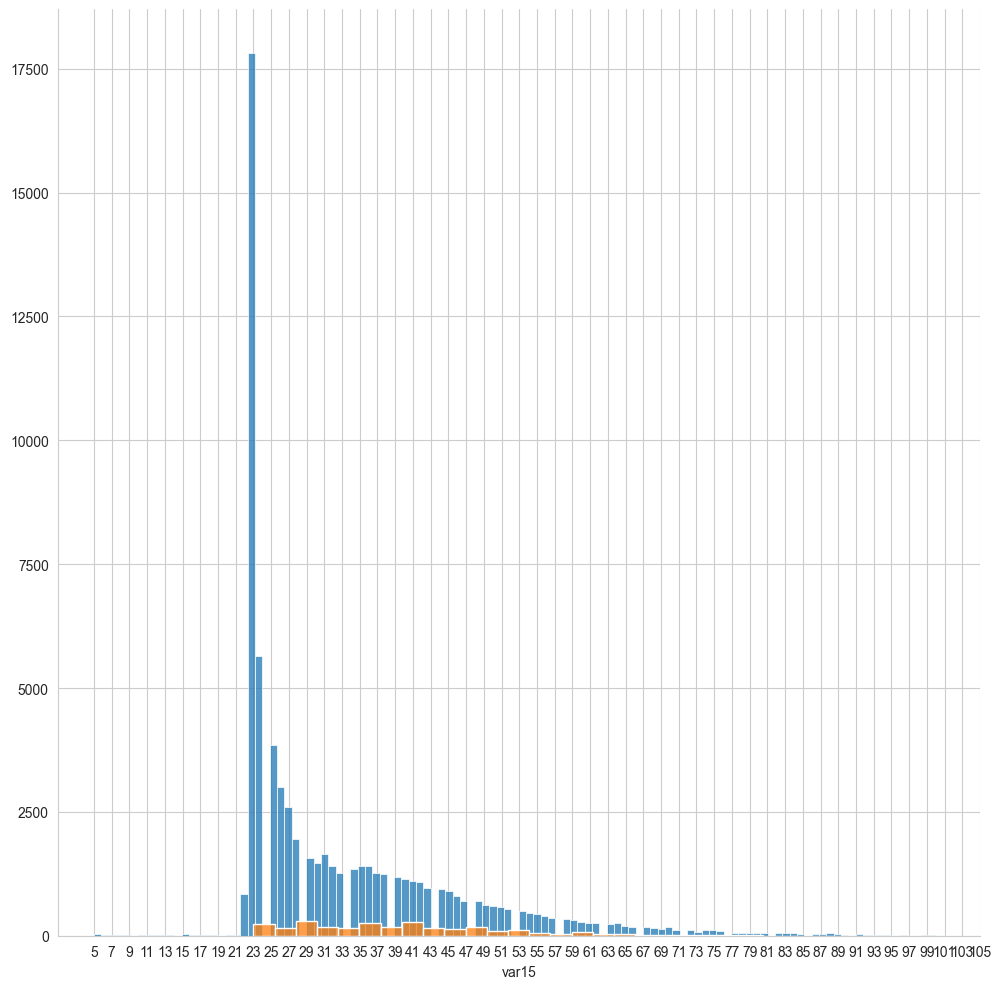

In [ ]:
plot = sns.FacetGrid(train, hue="TARGET",size=10)
plot.map(sns.histplot, "var15")
plt.xticks(np.arange(min(train["var15"]), max(train["var15"])+1, 2.0))
plot.set(xlim=(1,105))
plt.show()

Observation:
    
From above histogram we can see that almost all the unsatisfied customers have var15(age) value greater than or equal to 23. For higher values of var15 it is not very clear from histogram. so we will do numerical analysis to find out.

In [ ]:
train[train['TARGET'] == 0]['var15'].value_counts().sort_index()

5      27
6      21
7       6
8       9
9      18
       ..
100     6
101     1
102     3
104     2
105     1
Name: var15, Length: 100, dtype: int64

Observation:

The age of satisfied customers is between 5 to 105 years.we cannot draw any meaningful observation from this.

In [ ]:
train[train['TARGET'] == 1]['var15'].value_counts().sort_index()

23     119
24      58
25      58
26      80
27      85
      ... 
90       1
91       1
93       1
94       1
102      1
Name: var15, Length: 70, dtype: int64

Conclusion:

There no unsatisfied customer below age 23 and there are no unsatisfied customer above age 102.So, we can create a new feature where age is less than 23 because it clearly seperates satisfied and unsatisfied customers.

### saldo_medio_var5_ult3 feature

First, we will see the number of unique values in the saldo_medio_var5_ult3 feature to get the idea whether it is a categorical feature or numerical feature.

In [ ]:
train["saldo_medio_var5_ult3"].value_counts()

0.00       21850
2.88         987
2.34         904
2.85         864
2.07         856
           ...  
516.36         1
1229.40        1
82.35          1
1750.17        1
1025.37        1
Name: saldo_medio_var5_ult3, Length: 17330, dtype: int64

Observation:

The feature is a numerical feature and the value 0 has the highest frequency among all other values.

Let's plot the distribution to further analyze it.

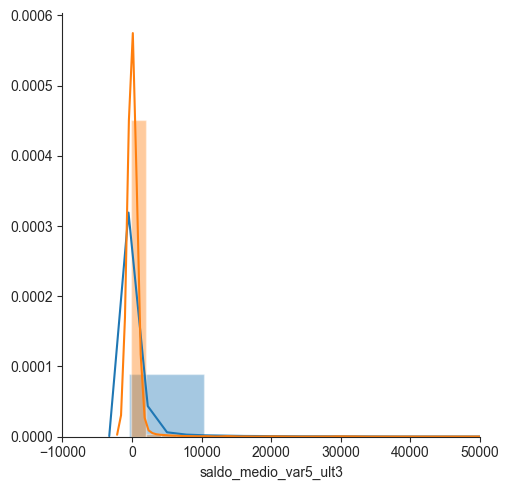

In [ ]:
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.distplot, "saldo_medio_var5_ult3")
g.set(xlim=(-10000,50000))
plt.show()

Observation:
    
The distributions are mostly overlapping and one thing we can see here is that for unsatisfied customers the saldo_medio_var5_ult3 is mostly 0. we have to further analyze this in comparision with satisfied customers having saldo_medio_var5_ult3 value as 0.

In [ ]:
train[train['saldo_medio_var5_ult3'] == 0.0]['TARGET'].value_counts()

0    20201
1     1649
Name: TARGET, dtype: int64

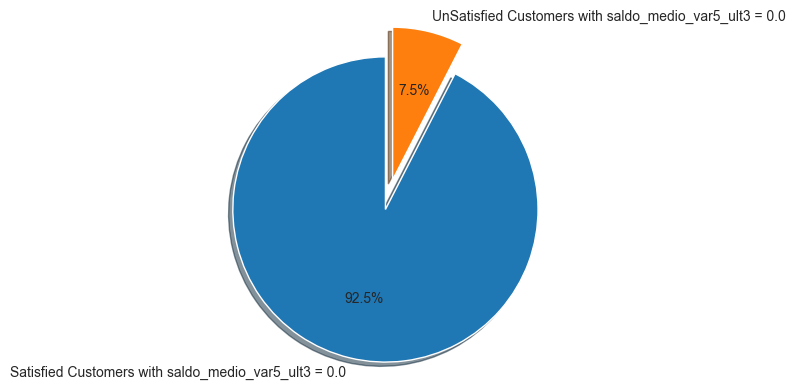

In [ ]:
plt.close()
labels = 'Satisfied Customers with saldo_medio_var5_ult3 = 0.0', 'UnSatisfied Customers with saldo_medio_var5_ult3 = 0.0'
sizes = [train[train['saldo_medio_var5_ult3'] == 0.0]['TARGET'].value_counts()[0],train[train['saldo_medio_var5_ult3'] == 0.0]['TARGET'].value_counts()[1]]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:
    
From above pie chart we can see that saldo_medio_var5_ult3 equal to zero value has 92.5% of the customers as satisfied whereas 7.5% of the customers are unsatisfied. So, clearly we can use it as feature to seperate satisfied and unsatisfied customers. 

Conclusion:

From the above analysis we observed that most of the values of the saldo_medio_var5_ult3 are 0. The saldo_medio_var5_ult3 equal to 0 is realted to customer satisfaction because most customers who have saldo_medio_var5_ult3 equal to 0 are satisfied. So, we will use this as a feature.

## 3. Feature Importance using XGBClassifier model

Here we are using XGBClassifier model to find the feature importance.

[01:05:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


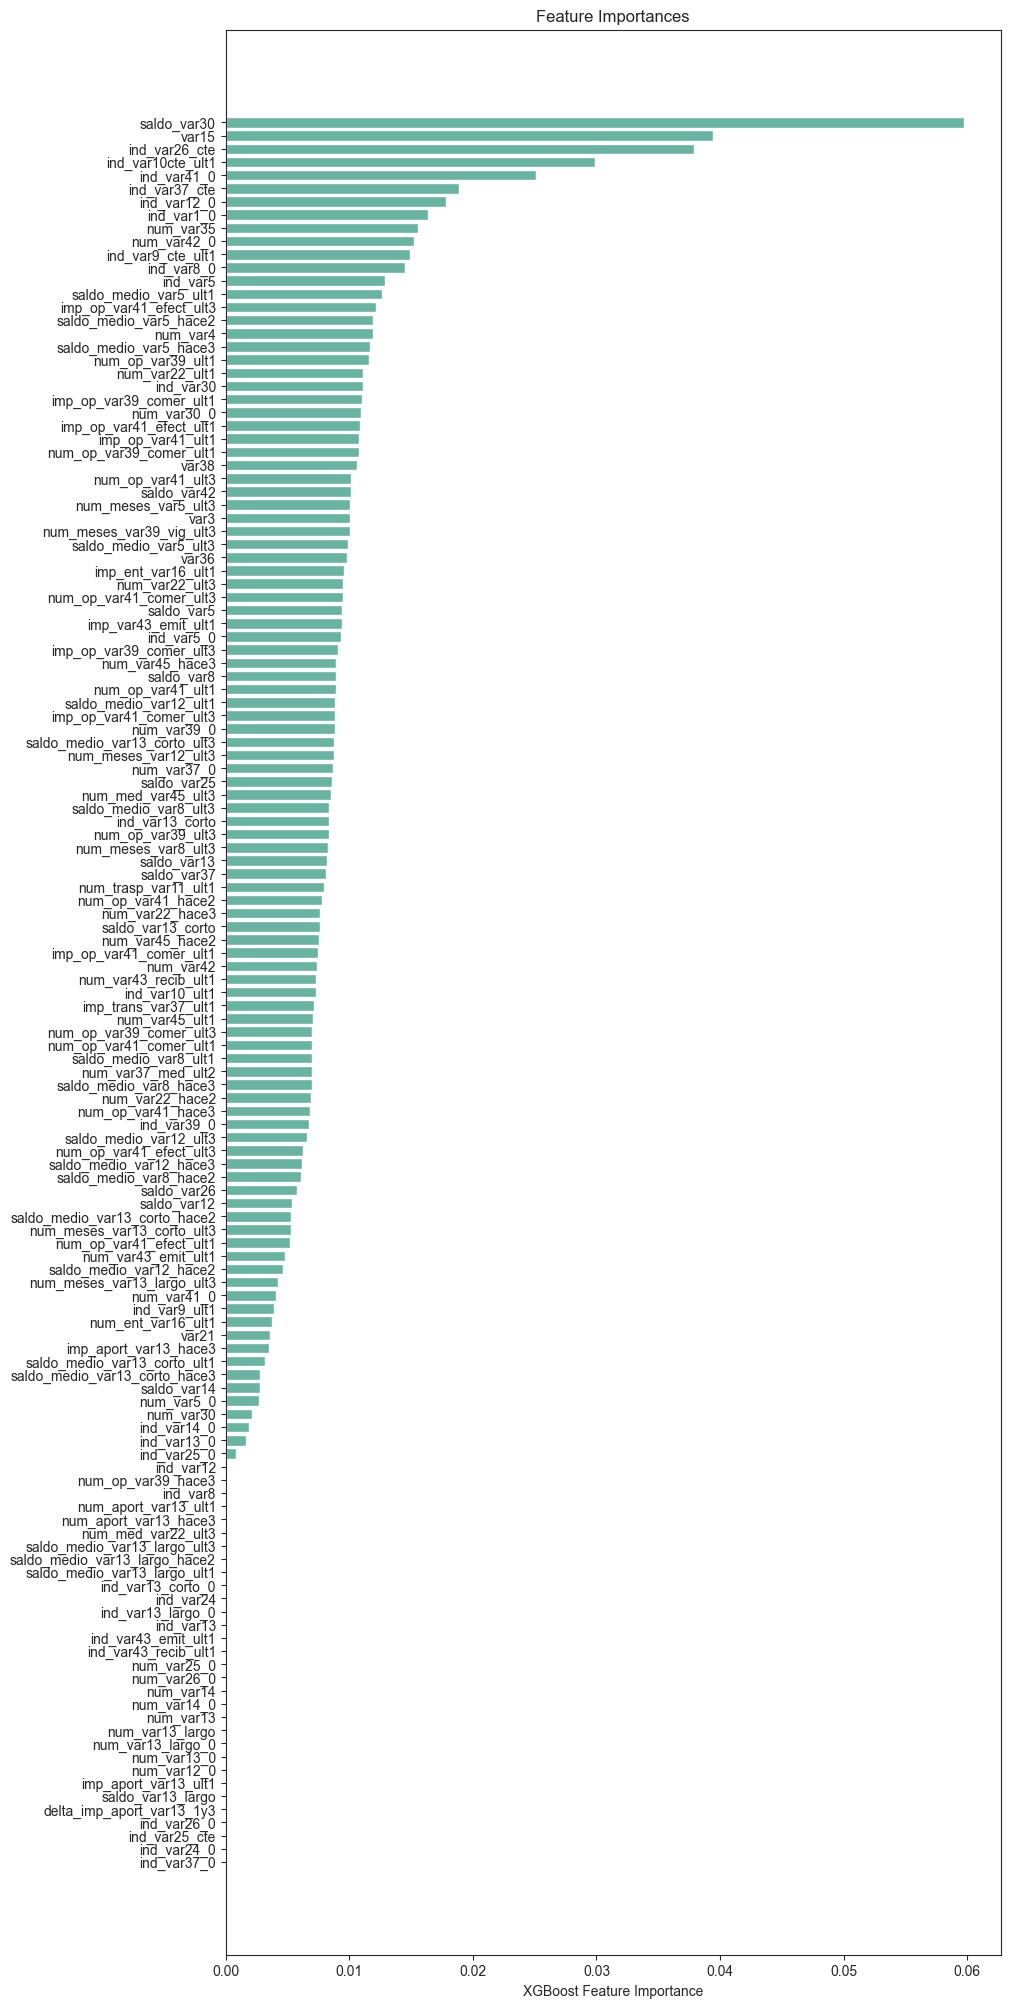

In [ ]:
from xgboost import XGBClassifier
features = train.drop(['ID','TARGET'],axis=1)
target = train['TARGET']
col_names = features.columns
model = XGBClassifier()
model.fit(features, target)
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize=(10,25))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center',color='#69b3a2')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('XGBoost Feature Importance')
plt.show()

Observation:

From the above bar chart we can see that the top 3 most important features are saldo_var30, var15 and ind_var26_cte. we have already analyzed var15 so we will analyze saldo_var30 and ind_var26_cte features.

### saldo_var30 feature

First we will see whether it is a categorical or numerical feature.

In [ ]:
train['saldo_var30'].value_counts()

0.00        17499
3.00        16583
90.00        4890
30.00        1583
15.00        1441
            ...  
1107.75         1
31681.80        1
581.61          1
30276.54        1
48191.22        1
Name: saldo_var30, Length: 16940, dtype: int64

Observation:

saldo_var30 is a numerical feature and the value 0.0 has the highest frequency followed by value 3.0. 

Let's plot distribution of saldo_var30 feature to further analyze the saldo_var30 feature.

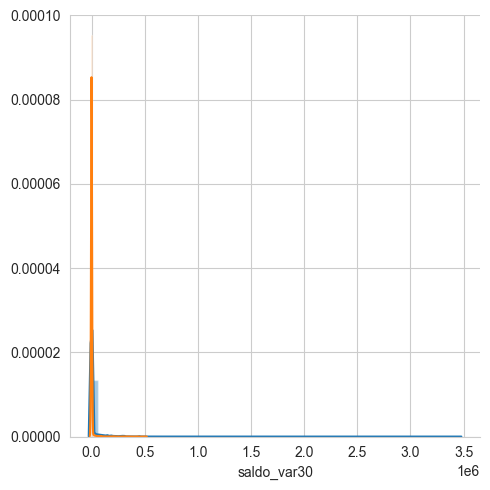

In [ ]:
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.distplot, "saldo_var30")
plt.show()

Observation:

The distribution is very skewed so we cannot say anything from this view. so we will zoom in a little to understand it properly.

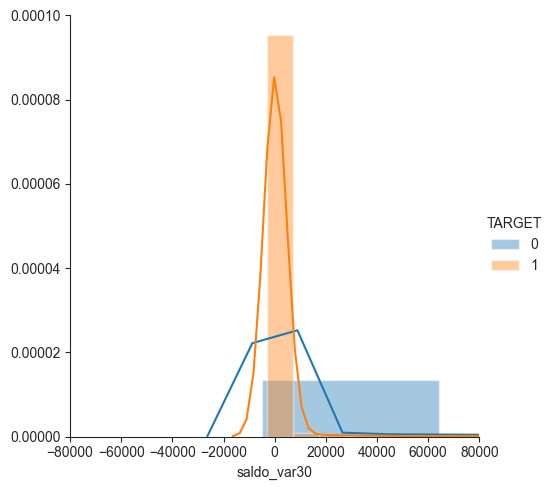

In [ ]:
plt.close()
sns.set_style("ticks")
plot = sns.FacetGrid(train, hue="TARGET", size=5) \
   .map(sns.distplot, "saldo_var30") \
   .add_legend();
#Reference:
#https://www.kite.com/python/answers/how-to-set-axis-limits-in-a-seaborn-lmplot-facetgrid-in-python
plot.set(xlim=(-80000,80000))
plt.show();

Observation:
    
The probability of the unsatisfied customers near saldo_var30 value of 0 is higher than for satisfied customers. Before saldo_var30 value around -18000 and after saldo_var30 value around 12000, the probability of satisfied customers is higher than probability of unsatisfied customers.

Let's plot a box plot to get better idea about the spread of the values.

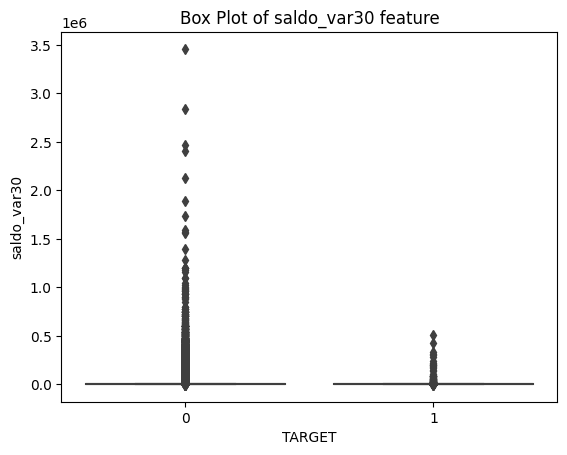

In [ ]:
plot = sns.boxplot(x='TARGET',y='saldo_var30', data=train)
plt.title("Box Plot of saldo_var30 feature")
plt.show()

Observation:

Here we can see that the box plots are sqeezed and we cannot analyze it properly. So, to analyze it we have to zoom in a little.

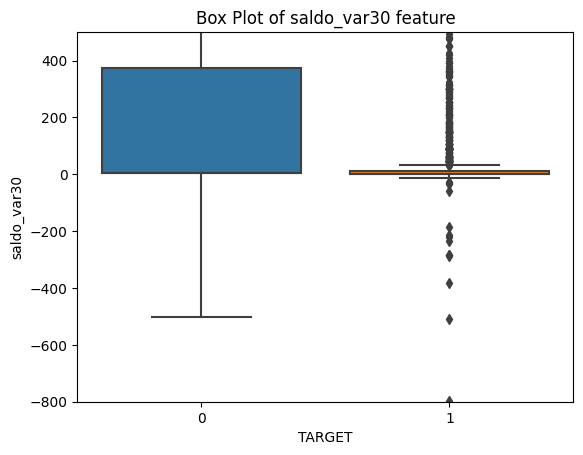

In [ ]:
plot = sns.boxplot(x='TARGET',y='saldo_var30', data=train)
plt.title("Box Plot of saldo_var30 feature")
plot.set(ylim=(-800,500))

plt.show()

Observation:

Most of the unsatisfied customers have saldo_var30 value equal to 0. For most of the satisfied customers the saldo_var30 value occurs in range from 0 to roughly around 380. 

In [ ]:
#Median, Percentile, Quantile, IQR, MAD
print("\nMedians for saldo_var30 feature:")
print(f"satisfied:{np.median(train[train['TARGET']==0]['saldo_var30'])}")
print(f"unsatisfied:{np.median(train[train['TARGET']==1]['saldo_var30'])}")

print("\nQuantiles for saldo_var30 feature:")
print(f"satisfied:{np.percentile(train[train['TARGET']==0]['saldo_var30'],np.arange(0, 100, 25))}")
print(f"unsatisfied:{np.percentile(train[train['TARGET']==1]['saldo_var30'],np.arange(0, 100, 25))}")

print("\n90th Percentiles for saldo_var30 feature:")
print(f"satisfied:{np.percentile(train[train['TARGET']==0]['saldo_var30'],90)}")
print(f"unsatisfied:{np.percentile(train[train['TARGET']==1]['saldo_var30'],90)}")

from statsmodels import robust
print ("\nMedian Absolute Deviation for saldo_var30 feature:")
print(f"satisfied:{robust.mad(train[train['TARGET']==0]['saldo_var30'])}")
print(f"unsatisfied:{robust.mad(train[train['TARGET']==1]['saldo_var30'])}")


Medians for saldo_var30 feature:
satisfied:6.0
unsatisfied:0.0

Quantiles for saldo_var30 feature:
satisfied:[-4.942260e+03  3.000000e+00  6.000000e+00  3.728775e+02]
unsatisfied:[-2895.72       0.         0.        12.8175]

90th Percentiles for saldo_var30 feature:
satisfied:15000.0
unsatisfied:361.85100000000017

Median Absolute Deviation for saldo_var30 feature:
satisfied:8.895613311033612
unsatisfied:0.0


Observation:

50% of the unsatisfied customers have saldo_var30 value less than or equal to 0. whereas 50% of the satisfied customers have saldo_var30 value less than or equal to 6. 90% of unsatisfied customers have saldo_var30 value less than or equal to 361.85. whereas 90% of the satisfied customers have saldo_var30 value less than or equal to 15000.

We need to further analyze the pattern of saldo_var30 equal to 0 with the help of percentages

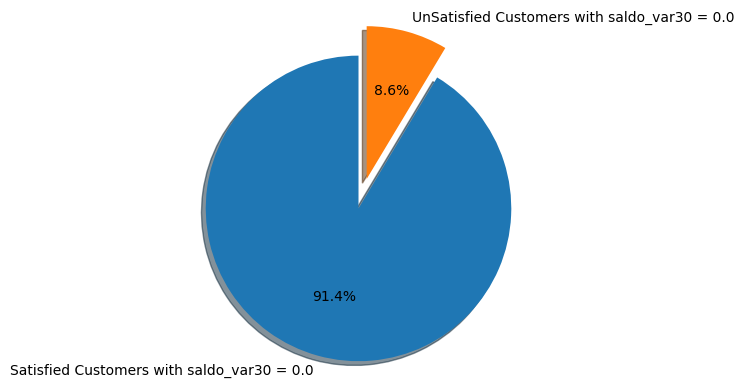

In [ ]:
plt.close()
labels = 'Satisfied Customers with saldo_var30 = 0.0', 'UnSatisfied Customers with saldo_var30 = 0.0'
sizes = [train[train['saldo_var30'] == 0.0]['TARGET'].value_counts()[0],train[train['saldo_var30'] == 0.0]['TARGET'].value_counts()[1]]
explode = (0, 0.2) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Observation:

91.4% of the customers are satisfied with saldo_var30 value as 0 and 8.6% of the customers are unsatisfied with saldo_var30 equal to 0. So, clearly we can see that saldo_var30 value equal to 0 affect the customer satisfaction hence it is an important pattern. 

Conclusion:

saldo_var30 value equal to 0 is certainly helpful in distinguishing satisfied and unsatisfied customers.Hence, we can use this as a feature, that would help in the classification.

### ind_var26_cte feature

First, let's see whether this feature is a categorical or numerical feature.

In [ ]:
train["ind_var26_cte"].value_counts()

0    68985
1     2095
Name: ind_var26_cte, dtype: int64

Observation:
    
ind_var26_cte feature is a categorical feature and 68985 customers have value 0 and  2095 customers have value 1.

Let's further analyze the ind)var26_cte feature by plotting a histogram.

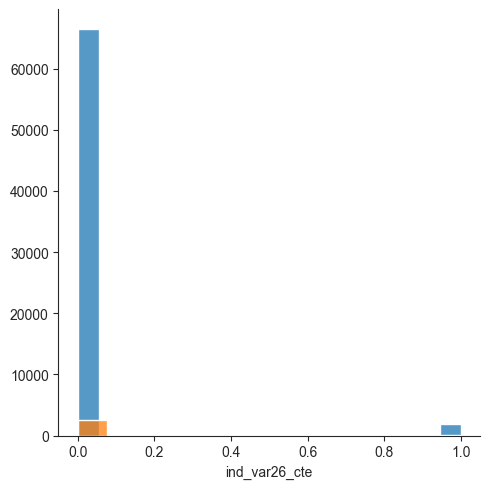

In [ ]:
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.histplot, "ind_var26_cte")
plt.show()

Observation:
    
From above histogram we can see that most of the unsatisfied customers have ind_var26_cte value equal to 0 and for ind_var26_cte we cannot see any unsatisfied customers because it is very small in comparision to unsatisfied customers with ind_var26_cte value 0.

In [ ]:
train[train['ind_var26_cte']==0]['TARGET'].value_counts()

0    66413
1     2572
Name: TARGET, dtype: int64

In [ ]:
train[train['ind_var26_cte']==1]['TARGET'].value_counts()

0    1955
1     140
Name: TARGET, dtype: int64

Observation:

There are only 140 unsatisfied customers with ind_var26_cte value as 1 whereas there are 2572 customers with ind_var26_cte value as 0. So, we cannot draw any conclusions from above because in general less customers have ind_var26_cte value as 1 and more customers have ind_var26_cte value as 0.

Conclusion:

The ind_var26_cte feature has most of the values as 0. Here we cannot use ind_var26_cte equal to 0 as a feature to seperate satisfied and unsatisfied customers because there is a lot of overlapping here because both classes have majority values as 0.

We will analyze one more feature called var3 because it is mentioned in various kaggle discussion and in various blogs.

### var3

Various kaggle discussion and blogs says that this feature might be the information about the region of the customer.

First lets check whether the feature is categorical or numerical.

In [ ]:
train['var3'].value_counts()

 2         69236
 8           138
 9           110
 3           108
-999999      107
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

Observation:

It is a numerical feature and the value 2 has the highest frequency followed by value 8.

In [ ]:
train['var3'].value_counts().sort_index()

-999999      107
 0            73
 1           105
 2         69236
 3           108
           ...  
 228           1
 229           1
 231           1
 235           1
 238           1
Name: var3, Length: 208, dtype: int64

Observation:

Here we can see that -999999 is an outlier in the given range of values. so we will replace -999999 value with the most frequent value that is 2. 

Now let's analyze the feature by plotting its histogram

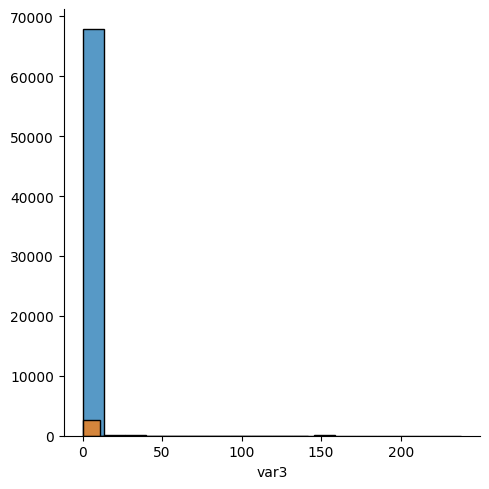

In [ ]:
g = sns.FacetGrid(train, hue="TARGET",size=5)
g.map(sns.histplot, "var3")
plt.show()

Observation:

Almost all the values of var3 feature are surrounded in range 0 to 15 for both satisfied and unsatisfied customers. it has very few values above 15.

In [ ]:
train[train['var3']==2]['TARGET'].value_counts()

0    66686
1     2657
Name: TARGET, dtype: int64

Conclusion:

Both satisfied and unsatisfied customers have var3 values as 2. So, we can see that there is a lot of overlapping here and hence by analyzing this feature we did not found any pattern that can be of use.

# Modeling

# Data Preprocessing for modeling

In [68]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
target = train['TARGET']

## Removing Features with all features same except TARGET value

In [5]:
features_train = train.drop(['ID','TARGET'],axis=1)

In [6]:
duplicate_features = train[train.duplicated(subset=features_train.columns,keep=False)]
duplicate_features.shape

(5933, 371)

In [7]:
features_dup = duplicate_features.drop(['ID'],axis=1)
same_label = duplicate_features[duplicate_features.duplicated(subset=features_dup.columns,keep=False)]
same_label.shape

(5824, 371)

In [8]:
final_df = duplicate_features[~duplicate_features.index.isin(same_label.index)]
final_df.shape

(109, 371)

In [9]:
train.drop(final_df.index,inplace=True)
target.drop(final_df.index,inplace=True)
train.shape,target.shape

((75911, 371), (75911,))

In [69]:
test_id = test['ID']
test = test.drop(['ID'],axis=1)
train = train.drop(['ID'],axis=1)

In [11]:
target = train['TARGET']
train = train.drop(['TARGET'],axis=1)

## Removing Constant Features

In [12]:
feature_list=[]
for col in train.columns:
    if len(train[col].value_counts()) > 1:
        feature_list.append(col)
train = train[feature_list]
test = test[feature_list]

## Removing Correlated Features

In [13]:
#Reference:
#https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb
def correlation(dataset, threshold):
    '''This function returns the names of correlated features.'''
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(train, 0.96)
train = train.drop(corr_features,axis=1)
train.shape

(75911, 212)

In [14]:
test = test[train.columns]

# Feature Engineering

In [15]:
train['count_zeros'] = (train == 0).astype(int).sum(axis=1)
test['count_zeros'] = (test == 0).astype(int).sum(axis=1)

In [16]:
train['var38'] = np.log(train['var38'])
test['var38'] = np.log(test['var38'])

In [ ]:
var15 = test['var15']
saldo_var30 = test['saldo_var30']

In [ ]:
train['var3'].iloc[train['var3']==-999999] = 2

# Approach - 1 (Custom Stacking Classifier)

In [17]:
X = train
y = target

## Splitting The Data

In [18]:
from sklearn.model_selection import train_test_split
D1_X, D2_X, D1_y, D2_y = train_test_split(X, y, test_size=0.5, random_state=42,stratify=y)

## Sampling with Replacement

In [3]:
def sampling_with_replacement(X,y):
    rows = np.random.choice(X.shape[0],30000,replace=True)
    return X.iloc[rows], y.iloc[rows]

In [21]:
x1,y1 = sampling_with_replacement(D1_X,D1_y)
x2,y2 = sampling_with_replacement(D1_X,D1_y)
x3,y3 = sampling_with_replacement(D1_X,D1_y)
x4,y4 = sampling_with_replacement(D1_X,D1_y)
x5,y5 = sampling_with_replacement(D1_X,D1_y)
x6,y6 = sampling_with_replacement(D1_X,D1_y)
x7,y7 = sampling_with_replacement(D1_X,D1_y)
x8,y8 = sampling_with_replacement(D1_X,D1_y)
x9,y9 = sampling_with_replacement(D1_X,D1_y)
x10,y10 = sampling_with_replacement(D1_X,D1_y)
x11,y11 = sampling_with_replacement(D1_X,D1_y)
x12,y12 = sampling_with_replacement(D1_X,D1_y)
x13,y13 = sampling_with_replacement(D1_X,D1_y)
x14,y14 = sampling_with_replacement(D1_X,D1_y)
x15,y15 = sampling_with_replacement(D1_X,D1_y)
x16,y16 = sampling_with_replacement(D1_X,D1_y)
x17,y17 = sampling_with_replacement(D1_X,D1_y)
x18,y18 = sampling_with_replacement(D1_X,D1_y)
x19,y19 = sampling_with_replacement(D1_X,D1_y)
x20,y20 = sampling_with_replacement(D1_X,D1_y)

## Training 20 Models(1-20)

In [22]:
from xgboost import XGBClassifier
model_1= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_1.fit(x1,y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [23]:
from xgboost import XGBClassifier
model_2= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_2.fit(x2,y2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
from xgboost import XGBClassifier
model_3= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_3.fit(x3,y3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [25]:
from xgboost import XGBClassifier
model_4 = XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_4.fit(x4,y4)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_5 = XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_5.fit(x5,y5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_6 = XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_6.fit(x6,y6)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_7= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_7.fit(x7,y7)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_8= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_8.fit(x8,y8)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model_9= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_9.fit(x9,y9)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
from xgboost import XGBClassifier
model_10= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_10.fit(x10,y10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [32]:
from xgboost import XGBClassifier
model_11= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_11.fit(x11,y11)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [33]:
from xgboost import XGBClassifier
model_12= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_12.fit(x12,y12)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
from xgboost import XGBClassifier
model_13= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_13.fit(x13,y13)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
from xgboost import XGBClassifier
model_14= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_14.fit(x14,y14)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
from xgboost import XGBClassifier
model_15= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_15.fit(x15,y15)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
from xgboost import XGBClassifier
model_16= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_16.fit(x16,y16)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
from xgboost import XGBClassifier
model_17= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_17.fit(x17,y17)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
from xgboost import XGBClassifier
model_18= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_18.fit(x18,y18)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [40]:
from xgboost import XGBClassifier
model_19= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_19.fit(x19,y19)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
from xgboost import XGBClassifier
model_20= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_20.fit(x20,y20)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
import pickle
filename = 'model_1.pkl'
pickle.dump(model_1, open(filename, 'wb'))
filename = 'model_2.pkl'
pickle.dump(model_2, open(filename, 'wb'))
filename = 'model_3.pkl'
pickle.dump(model_3, open(filename, 'wb'))
filename = 'model_4.pkl'
pickle.dump(model_4, open(filename, 'wb'))
filename = 'model_5.pkl'
pickle.dump(model_5, open(filename, 'wb'))
filename = 'model_6.pkl'
pickle.dump(model_6, open(filename, 'wb'))
filename = 'model_7.pkl'
pickle.dump(model_7, open(filename, 'wb'))
filename = 'model_8.pkl'
pickle.dump(model_8, open(filename, 'wb'))
filename = 'model_9.pkl'
pickle.dump(model_9, open(filename, 'wb'))
filename = 'model_10.pkl'
pickle.dump(model_10, open(filename, 'wb'))
filename = 'model_11.pkl'
pickle.dump(model_11, open(filename, 'wb'))
filename = 'model_12.pkl'
pickle.dump(model_12, open(filename, 'wb'))
filename = 'model_13.pkl'
pickle.dump(model_13, open(filename, 'wb'))
filename = 'model_14.pkl'
pickle.dump(model_14, open(filename, 'wb'))
filename = 'model_15.pkl'
pickle.dump(model_15, open(filename, 'wb'))
filename = 'model_16.pkl'
pickle.dump(model_16, open(filename, 'wb'))
filename = 'model_17.pkl'
pickle.dump(model_17, open(filename, 'wb'))
filename = 'model_18.pkl'
pickle.dump(model_18, open(filename, 'wb'))
filename = 'model_19.pkl'
pickle.dump(model_19, open(filename, 'wb'))
filename = 'model_20.pkl'
pickle.dump(model_20, open(filename, 'wb'))

In [43]:
pred_1 = model_1.predict_proba(D2_X)[:,1]
pred_2 = model_2.predict_proba(D2_X)[:,1]
pred_3 = model_3.predict_proba(D2_X)[:,1]
pred_4 = model_4.predict_proba(D2_X)[:,1]
pred_5 = model_5.predict_proba(D2_X)[:,1]
pred_6 = model_6.predict_proba(D2_X)[:,1]
pred_7 = model_7.predict_proba(D2_X)[:,1]
pred_8 = model_8.predict_proba(D2_X)[:,1]
pred_9 = model_9.predict_proba(D2_X)[:,1]
pred_10 = model_10.predict_proba(D2_X)[:,1]
pred_11 = model_11.predict_proba(D2_X)[:,1]
pred_12 = model_12.predict_proba(D2_X)[:,1]
pred_13 = model_13.predict_proba(D2_X)[:,1]
pred_14 = model_14.predict_proba(D2_X)[:,1]
pred_15 = model_15.predict_proba(D2_X)[:,1]
pred_16 = model_16.predict_proba(D2_X)[:,1]
pred_17 = model_17.predict_proba(D2_X)[:,1]
pred_18 = model_18.predict_proba(D2_X)[:,1]
pred_19 = model_19.predict_proba(D2_X)[:,1]
pred_20 = model_20.predict_proba(D2_X)[:,1]

In [44]:
df = pd.DataFrame()
df['pred_1'] = pred_1
df['pred_2'] = pred_2
df['pred_3'] = pred_3
df['pred_4'] = pred_4
df['pred_5'] = pred_5
df['pred_6'] = pred_6
df['pred_7'] = pred_7
df['pred_8'] = pred_8
df['pred_9'] = pred_9
df['pred_10'] = pred_10
df['pred_11'] = pred_11
df['pred_12'] = pred_12
df['pred_13'] = pred_13
df['pred_14'] = pred_14
df['pred_15'] = pred_15
df['pred_16'] = pred_16
df['pred_17'] = pred_17
df['pred_18'] = pred_18
df['pred_19'] = pred_19
df['pred_20'] = pred_20

In [45]:
filename = 'df.pkl'
pickle.dump(df, open(filename, 'wb'))

In [46]:
pred_1 = model_1.predict_proba(test)[:,1]
pred_2 = model_2.predict_proba(test)[:,1]
pred_3 = model_3.predict_proba(test)[:,1]
pred_4 = model_4.predict_proba(test)[:,1]
pred_5 = model_5.predict_proba(test)[:,1]
pred_6 = model_6.predict_proba(test)[:,1]
pred_7 = model_7.predict_proba(test)[:,1]
pred_8 = model_8.predict_proba(test)[:,1]
pred_9 = model_9.predict_proba(test)[:,1]
pred_10 = model_10.predict_proba(test)[:,1]
pred_11 = model_11.predict_proba(test)[:,1]
pred_12 = model_12.predict_proba(test)[:,1]
pred_13 = model_13.predict_proba(test)[:,1]
pred_14 = model_14.predict_proba(test)[:,1]
pred_15 = model_15.predict_proba(test)[:,1]
pred_16 = model_16.predict_proba(test)[:,1]
pred_17 = model_17.predict_proba(test)[:,1]
pred_18 = model_18.predict_proba(test)[:,1]
pred_19 = model_19.predict_proba(test)[:,1]
pred_20 = model_20.predict_proba(test)[:,1]

In [47]:
df_test = pd.DataFrame()
df_test['pred_1'] = pred_1
df_test['pred_2'] = pred_2
df_test['pred_3'] = pred_3
df_test['pred_4'] = pred_4
df_test['pred_5'] = pred_5
df_test['pred_6'] = pred_6
df_test['pred_7'] = pred_7
df_test['pred_8'] = pred_8
df_test['pred_9'] = pred_9
df_test['pred_10'] = pred_10
df_test['pred_11'] = pred_11
df_test['pred_12'] = pred_12
df_test['pred_13'] = pred_13
df_test['pred_14'] = pred_14
df_test['pred_15'] = pred_15
df_test['pred_16'] = pred_16
df_test['pred_17'] = pred_17
df_test['pred_18'] = pred_18
df_test['pred_19'] = pred_19
df_test['pred_20'] = pred_20

In [48]:
filename = 'df_test.pkl'
pickle.dump(df_test, open(filename, 'wb'))

In [49]:
filename = 'D1_X.pkl'
pickle.dump(D1_X, open(filename, 'wb'))
filename = 'D1_y.pkl'
pickle.dump(D1_y, open(filename, 'wb'))
filename = 'D2_X.pkl'
pickle.dump(D2_X, open(filename, 'wb'))
filename = 'D2_y.pkl'
pickle.dump(D2_y, open(filename, 'wb'))
filename = 'test.pkl'
pickle.dump(test, open(filename, 'wb'))

In [3]:
import pickle
D1_X = pickle.load(open('D1_X.pkl', 'rb'))
D1_y = pickle.load(open('D1_y.pkl', 'rb'))
D2_X = pickle.load(open('D2_X.pkl', 'rb'))
D2_y = pickle.load(open('D2_y.pkl', 'rb'))
test = pickle.load(open('test.pkl', 'rb'))

## Sampling with Replacement

In [50]:
x21,y21 = sampling_with_replacement(D1_X,D1_y)
x22,y22 = sampling_with_replacement(D1_X,D1_y)
x23,y23 = sampling_with_replacement(D1_X,D1_y)
x24,y24 = sampling_with_replacement(D1_X,D1_y)
x25,y25 = sampling_with_replacement(D1_X,D1_y)
x26,y26 = sampling_with_replacement(D1_X,D1_y)
x27,y27 = sampling_with_replacement(D1_X,D1_y)
x28,y28 = sampling_with_replacement(D1_X,D1_y)
x29,y29 = sampling_with_replacement(D1_X,D1_y)
x30,y30 = sampling_with_replacement(D1_X,D1_y)
x31,y31 = sampling_with_replacement(D1_X,D1_y)
x32,y32 = sampling_with_replacement(D1_X,D1_y)
x33,y33 = sampling_with_replacement(D1_X,D1_y)
x34,y34 = sampling_with_replacement(D1_X,D1_y)
x35,y35 = sampling_with_replacement(D1_X,D1_y)
x36,y36 = sampling_with_replacement(D1_X,D1_y)
x37,y37 = sampling_with_replacement(D1_X,D1_y)
x38,y38 = sampling_with_replacement(D1_X,D1_y)
x39,y39 = sampling_with_replacement(D1_X,D1_y)
x40,y40 = sampling_with_replacement(D1_X,D1_y)

## Training 20 models (21-40)

In [51]:
from xgboost import XGBClassifier
model_21= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_21.fit(x21,y21)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
from xgboost import XGBClassifier
model_22= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_22.fit(x22,y22)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
from xgboost import XGBClassifier
model_23= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_23.fit(x23,y23)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
from xgboost import XGBClassifier
model_24= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_24.fit(x24,y24)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [55]:
from xgboost import XGBClassifier
model_25= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_25.fit(x25,y25)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
from xgboost import XGBClassifier
model_26= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_26.fit(x26,y26)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [57]:
from xgboost import XGBClassifier
model_27= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_27.fit(x27,y27)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [58]:
from xgboost import XGBClassifier
model_28= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_28.fit(x28,y28)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [59]:
from xgboost import XGBClassifier
model_29= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_29.fit(x29,y29)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
from xgboost import XGBClassifier
model_30= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_30.fit(x30,y30)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [61]:
from xgboost import XGBClassifier
model_31= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_31.fit(x31,y31)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
from xgboost import XGBClassifier
model_32= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_32.fit(x32,y32)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [63]:
from xgboost import XGBClassifier
model_33= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_33.fit(x33,y33)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
from xgboost import XGBClassifier
model_34= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_34.fit(x34,y34)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [65]:
from xgboost import XGBClassifier
model_35= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_35.fit(x35,y35)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [66]:
from xgboost import XGBClassifier
model_36= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_36.fit(x36,y36)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [67]:
from xgboost import XGBClassifier
model_37= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_37.fit(x37,y37)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [68]:
from xgboost import XGBClassifier
model_38= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_38.fit(x38,y38)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [69]:
from xgboost import XGBClassifier
model_39= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_39.fit(x39,y39)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
from xgboost import XGBClassifier
model_40= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_40.fit(x40,y40)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [71]:
import pickle
filename = 'model_21.pkl'
pickle.dump(model_21, open(filename, 'wb'))
filename = 'model_22.pkl'
pickle.dump(model_22, open(filename, 'wb'))
filename = 'model_23.pkl'
pickle.dump(model_23, open(filename, 'wb'))
filename = 'model_24.pkl'
pickle.dump(model_24, open(filename, 'wb'))
filename = 'model_25.pkl'
pickle.dump(model_25, open(filename, 'wb'))
filename = 'model_26.pkl'
pickle.dump(model_26, open(filename, 'wb'))
filename = 'model_27.pkl'
pickle.dump(model_27, open(filename, 'wb'))
filename = 'model_28.pkl'
pickle.dump(model_28, open(filename, 'wb'))
filename = 'model_29.pkl'
pickle.dump(model_29, open(filename, 'wb'))
filename = 'model_30.pkl'
pickle.dump(model_30, open(filename, 'wb'))
filename = 'model_31.pkl'
pickle.dump(model_31, open(filename, 'wb'))
filename = 'model_32.pkl'
pickle.dump(model_32, open(filename, 'wb'))
filename = 'model_33.pkl'
pickle.dump(model_33, open(filename, 'wb'))
filename = 'model_34.pkl'
pickle.dump(model_34, open(filename, 'wb'))
filename = 'model_35.pkl'
pickle.dump(model_35, open(filename, 'wb'))
filename = 'model_36.pkl'
pickle.dump(model_36, open(filename, 'wb'))
filename = 'model_37.pkl'
pickle.dump(model_37, open(filename, 'wb'))
filename = 'model_38.pkl'
pickle.dump(model_38, open(filename, 'wb'))
filename = 'model_39.pkl'
pickle.dump(model_39, open(filename, 'wb'))
filename = 'model_40.pkl'
pickle.dump(model_40, open(filename, 'wb'))

In [72]:
pred_21 = model_21.predict_proba(D2_X)[:,1]
pred_22 = model_22.predict_proba(D2_X)[:,1]
pred_23 = model_23.predict_proba(D2_X)[:,1]
pred_24 = model_24.predict_proba(D2_X)[:,1]
pred_25 = model_25.predict_proba(D2_X)[:,1]
pred_26 = model_26.predict_proba(D2_X)[:,1]
pred_27 = model_27.predict_proba(D2_X)[:,1]
pred_28 = model_28.predict_proba(D2_X)[:,1]
pred_29 = model_29.predict_proba(D2_X)[:,1]
pred_30 = model_30.predict_proba(D2_X)[:,1]
pred_31 = model_31.predict_proba(D2_X)[:,1]
pred_32 = model_32.predict_proba(D2_X)[:,1]
pred_33 = model_33.predict_proba(D2_X)[:,1]
pred_34 = model_34.predict_proba(D2_X)[:,1]
pred_35 = model_35.predict_proba(D2_X)[:,1]
pred_36 = model_36.predict_proba(D2_X)[:,1]
pred_37 = model_37.predict_proba(D2_X)[:,1]
pred_38 = model_38.predict_proba(D2_X)[:,1]
pred_39 = model_39.predict_proba(D2_X)[:,1]
pred_40 = model_40.predict_proba(D2_X)[:,1]

In [73]:
import pickle
df = pickle.load(open('df.pkl', 'rb'))

In [74]:
df['pred_21'] = pred_21
df['pred_22'] = pred_22
df['pred_23'] = pred_23
df['pred_24'] = pred_24
df['pred_25'] = pred_25
df['pred_26'] = pred_26
df['pred_27'] = pred_27
df['pred_28'] = pred_28
df['pred_29'] = pred_29
df['pred_30'] = pred_30
df['pred_31'] = pred_31
df['pred_32'] = pred_32
df['pred_33'] = pred_33
df['pred_34'] = pred_34
df['pred_35'] = pred_35
df['pred_36'] = pred_36
df['pred_37'] = pred_37
df['pred_38'] = pred_38
df['pred_39'] = pred_39
df['pred_40'] = pred_40

In [75]:
import pickle
df = 'df.pkl'
pickle.dump(df, open(filename, 'wb'))

In [76]:
pred_21 = model_21.predict_proba(test)[:,1]
pred_22 = model_22.predict_proba(test)[:,1]
pred_23 = model_23.predict_proba(test)[:,1]
pred_24 = model_24.predict_proba(test)[:,1]
pred_25 = model_25.predict_proba(test)[:,1]
pred_26 = model_26.predict_proba(test)[:,1]
pred_27 = model_27.predict_proba(test)[:,1]
pred_28 = model_28.predict_proba(test)[:,1]
pred_29 = model_29.predict_proba(test)[:,1]
pred_30 = model_30.predict_proba(test)[:,1]
pred_31 = model_31.predict_proba(test)[:,1]
pred_32 = model_32.predict_proba(test)[:,1]
pred_33 = model_33.predict_proba(test)[:,1]
pred_34 = model_34.predict_proba(test)[:,1]
pred_35 = model_35.predict_proba(test)[:,1]
pred_36 = model_36.predict_proba(test)[:,1]
pred_37 = model_37.predict_proba(test)[:,1]
pred_38 = model_38.predict_proba(test)[:,1]
pred_39 = model_39.predict_proba(test)[:,1]
pred_40 = model_40.predict_proba(test)[:,1]

In [77]:
import pickle
df_test = pickle.load(open('df_test.pkl', 'rb'))

In [78]:
df_test['pred_21'] = pred_21
df_test['pred_22'] = pred_22
df_test['pred_23'] = pred_23
df_test['pred_24'] = pred_24
df_test['pred_25'] = pred_25
df_test['pred_26'] = pred_26
df_test['pred_27'] = pred_27
df_test['pred_28'] = pred_28
df_test['pred_29'] = pred_29
df_test['pred_30'] = pred_30
df_test['pred_31'] = pred_31
df_test['pred_32'] = pred_32
df_test['pred_33'] = pred_33
df_test['pred_34'] = pred_34
df_test['pred_35'] = pred_35
df_test['pred_36'] = pred_36
df_test['pred_37'] = pred_37
df_test['pred_38'] = pred_38
df_test['pred_39'] = pred_39
df_test['pred_40'] = pred_40

In [79]:
import pickle
df_test = 'df_test.pkl'
pickle.dump(df_test, open(filename, 'wb'))

In [3]:
import pickle
D1_X = pickle.load(open('D1_X.pkl', 'rb'))
D1_y = pickle.load(open('D1_y.pkl', 'rb'))
D2_X = pickle.load(open('D2_X.pkl', 'rb'))
D2_y = pickle.load(open('D2_y.pkl', 'rb'))
test = pickle.load(open('test.pkl', 'rb'))

## Sampling with Replacement

In [80]:
x41,y41 = sampling_with_replacement(D1_X,D1_y)
x42,y42 = sampling_with_replacement(D1_X,D1_y)
x43,y43 = sampling_with_replacement(D1_X,D1_y)
x44,y44 = sampling_with_replacement(D1_X,D1_y)
x45,y45 = sampling_with_replacement(D1_X,D1_y)
x46,y46 = sampling_with_replacement(D1_X,D1_y)
x47,y47 = sampling_with_replacement(D1_X,D1_y)
x48,y48 = sampling_with_replacement(D1_X,D1_y)
x49,y49 = sampling_with_replacement(D1_X,D1_y)
x50,y50 = sampling_with_replacement(D1_X,D1_y)
x51,y51 = sampling_with_replacement(D1_X,D1_y)
x52,y52 = sampling_with_replacement(D1_X,D1_y)
x53,y53 = sampling_with_replacement(D1_X,D1_y)
x54,y54 = sampling_with_replacement(D1_X,D1_y)
x55,y55 = sampling_with_replacement(D1_X,D1_y)
x56,y56 = sampling_with_replacement(D1_X,D1_y)
x57,y57 = sampling_with_replacement(D1_X,D1_y)
x58,y58 = sampling_with_replacement(D1_X,D1_y)
x59,y59 = sampling_with_replacement(D1_X,D1_y)
x60,y60 = sampling_with_replacement(D1_X,D1_y)

## Training 20 models (41-60)

In [81]:
from xgboost import XGBClassifier
model_41= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_41.fit(x41,y41)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [82]:
from xgboost import XGBClassifier
model_42= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_42.fit(x42,y42)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [83]:
from xgboost import XGBClassifier
model_43= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_43.fit(x43,y43)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [84]:
from xgboost import XGBClassifier
model_44= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_44.fit(x44,y44)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
from xgboost import XGBClassifier
model_45= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_45.fit(x45,y45)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [86]:
from xgboost import XGBClassifier
model_46= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_46.fit(x46,y46)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [87]:
from xgboost import XGBClassifier
model_47= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_47.fit(x47,y47)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
from xgboost import XGBClassifier
model_48= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_48.fit(x48,y48)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [89]:
from xgboost import XGBClassifier
model_49= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_49.fit(x49,y49)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [90]:
from xgboost import XGBClassifier
model_50= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_50.fit(x50,y50)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
from xgboost import XGBClassifier
model_51= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_51.fit(x51,y51)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [92]:
from xgboost import XGBClassifier
model_52= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_52.fit(x52,y52)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [93]:
from xgboost import XGBClassifier
model_53= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_53.fit(x53,y53)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
from xgboost import XGBClassifier
model_54= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_54.fit(x54,y54)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
from xgboost import XGBClassifier
model_55= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_55.fit(x55,y55)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [96]:
from xgboost import XGBClassifier
model_56= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_56.fit(x56,y56)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [97]:
from xgboost import XGBClassifier
model_57= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_57.fit(x57,y57)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [98]:
from xgboost import XGBClassifier
model_58= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_58.fit(x58,y58)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [99]:
from xgboost import XGBClassifier
model_59= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_59.fit(x59,y59)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [100]:
from xgboost import XGBClassifier
model_60= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_60.fit(x60,y60)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [101]:
import pickle
filename = 'model_41.pkl'
pickle.dump(model_41, open(filename, 'wb'))
filename = 'model_42.pkl'
pickle.dump(model_42, open(filename, 'wb'))
filename = 'model_43.pkl'
pickle.dump(model_43, open(filename, 'wb'))
filename = 'model_44.pkl'
pickle.dump(model_44, open(filename, 'wb'))
filename = 'model_45.pkl'
pickle.dump(model_45, open(filename, 'wb'))
filename = 'model_46.pkl'
pickle.dump(model_46, open(filename, 'wb'))
filename = 'model_47.pkl'
pickle.dump(model_47, open(filename, 'wb'))
filename = 'model_48.pkl'
pickle.dump(model_48, open(filename, 'wb'))
filename = 'model_49.pkl'
pickle.dump(model_49, open(filename, 'wb'))
filename = 'model_50.pkl'
pickle.dump(model_50, open(filename, 'wb'))
filename = 'model_51.pkl'
pickle.dump(model_51, open(filename, 'wb'))
filename = 'model_52.pkl'
pickle.dump(model_52, open(filename, 'wb'))
filename = 'model_53.pkl'
pickle.dump(model_53, open(filename, 'wb'))
filename = 'model_54.pkl'
pickle.dump(model_54, open(filename, 'wb'))
filename = 'model_55.pkl'
pickle.dump(model_55, open(filename, 'wb'))
filename = 'model_56.pkl'
pickle.dump(model_56, open(filename, 'wb'))
filename = 'model_57.pkl'
pickle.dump(model_57, open(filename, 'wb'))
filename = 'model_58.pkl'
pickle.dump(model_58, open(filename, 'wb'))
filename = 'model_59.pkl'
pickle.dump(model_59, open(filename, 'wb'))
filename = 'model_60.pkl'
pickle.dump(model_60, open(filename, 'wb'))

In [102]:
pred_41 = model_41.predict_proba(D2_X)[:,1]
pred_42 = model_42.predict_proba(D2_X)[:,1]
pred_43 = model_43.predict_proba(D2_X)[:,1]
pred_44 = model_44.predict_proba(D2_X)[:,1]
pred_45 = model_45.predict_proba(D2_X)[:,1]
pred_46 = model_46.predict_proba(D2_X)[:,1]
pred_47 = model_47.predict_proba(D2_X)[:,1]
pred_48 = model_48.predict_proba(D2_X)[:,1]
pred_49 = model_49.predict_proba(D2_X)[:,1]
pred_50 = model_50.predict_proba(D2_X)[:,1]
pred_51 = model_51.predict_proba(D2_X)[:,1]
pred_52 = model_52.predict_proba(D2_X)[:,1]
pred_53 = model_53.predict_proba(D2_X)[:,1]
pred_54 = model_54.predict_proba(D2_X)[:,1]
pred_55 = model_55.predict_proba(D2_X)[:,1]
pred_56 = model_56.predict_proba(D2_X)[:,1]
pred_57 = model_57.predict_proba(D2_X)[:,1]
pred_58 = model_58.predict_proba(D2_X)[:,1]
pred_59 = model_59.predict_proba(D2_X)[:,1]
pred_60 = model_60.predict_proba(D2_X)[:,1]

In [103]:
import pickle
df = pickle.load(open('df.pkl', 'rb'))

In [104]:
df['pred_41'] = pred_41
df['pred_42'] = pred_42
df['pred_43'] = pred_43
df['pred_44'] = pred_44
df['pred_45'] = pred_45
df['pred_46'] = pred_46
df['pred_47'] = pred_47
df['pred_48'] = pred_48
df['pred_49'] = pred_49
df['pred_50'] = pred_50
df['pred_51'] = pred_51
df['pred_52'] = pred_52
df['pred_53'] = pred_53
df['pred_54'] = pred_54
df['pred_55'] = pred_55
df['pred_56'] = pred_56
df['pred_57'] = pred_57
df['pred_58'] = pred_58
df['pred_59'] = pred_59
df['pred_60'] = pred_60

In [105]:
import pickle
df = 'df.pkl'
pickle.dump(df, open(filename, 'wb'))

In [106]:
pred_41 = model_41.predict_proba(test)[:,1]
pred_42 = model_42.predict_proba(test)[:,1]
pred_43 = model_43.predict_proba(test)[:,1]
pred_44 = model_44.predict_proba(test)[:,1]
pred_45 = model_45.predict_proba(test)[:,1]
pred_46 = model_46.predict_proba(test)[:,1]
pred_47 = model_47.predict_proba(test)[:,1]
pred_48 = model_48.predict_proba(test)[:,1]
pred_49 = model_49.predict_proba(test)[:,1]
pred_50 = model_50.predict_proba(test)[:,1]
pred_51 = model_51.predict_proba(test)[:,1]
pred_52 = model_52.predict_proba(test)[:,1]
pred_53 = model_53.predict_proba(test)[:,1]
pred_54 = model_54.predict_proba(test)[:,1]
pred_55 = model_55.predict_proba(test)[:,1]
pred_56 = model_56.predict_proba(test)[:,1]
pred_57 = model_57.predict_proba(test)[:,1]
pred_58 = model_58.predict_proba(test)[:,1]
pred_59 = model_59.predict_proba(test)[:,1]
pred_60 = model_60.predict_proba(test)[:,1]

In [107]:
import pickle
df_test = pickle.load(open('df_test.pkl', 'rb'))

In [108]:
df_test['pred_41'] = pred_41
df_test['pred_42'] = pred_42
df_test['pred_43'] = pred_43
df_test['pred_44'] = pred_44
df_test['pred_45'] = pred_45
df_test['pred_46'] = pred_46
df_test['pred_47'] = pred_47
df_test['pred_48'] = pred_48
df_test['pred_49'] = pred_49
df_test['pred_50'] = pred_50
df_test['pred_51'] = pred_51
df_test['pred_52'] = pred_52
df_test['pred_53'] = pred_53
df_test['pred_54'] = pred_54
df_test['pred_55'] = pred_55
df_test['pred_56'] = pred_56
df_test['pred_57'] = pred_57
df_test['pred_58'] = pred_58
df_test['pred_59'] = pred_59
df_test['pred_60'] = pred_60

In [109]:
import pickle
df = 'df_test.pkl'
pickle.dump(df_test, open(filename, 'wb'))

In [4]:
import pickle
D1_X = pickle.load(open('D1_X.pkl', 'rb'))
D1_y = pickle.load(open('D1_y.pkl', 'rb'))
D2_X = pickle.load(open('D2_X.pkl', 'rb'))
D2_y = pickle.load(open('D2_y.pkl', 'rb'))
test = pickle.load(open('test.pkl', 'rb'))

## Sampling with Replacement

In [5]:
x61,y61 = sampling_with_replacement(D1_X,D1_y)
x62,y62 = sampling_with_replacement(D1_X,D1_y)
x63,y63 = sampling_with_replacement(D1_X,D1_y)
x64,y64 = sampling_with_replacement(D1_X,D1_y)
x65,y65 = sampling_with_replacement(D1_X,D1_y)
x66,y66 = sampling_with_replacement(D1_X,D1_y)
x67,y67 = sampling_with_replacement(D1_X,D1_y)
x68,y68 = sampling_with_replacement(D1_X,D1_y)
x69,y69 = sampling_with_replacement(D1_X,D1_y)
x70,y70 = sampling_with_replacement(D1_X,D1_y)
x71,y71 = sampling_with_replacement(D1_X,D1_y)
x72,y72 = sampling_with_replacement(D1_X,D1_y)
x73,y73 = sampling_with_replacement(D1_X,D1_y)
x74,y74 = sampling_with_replacement(D1_X,D1_y)
x75,y75 = sampling_with_replacement(D1_X,D1_y)
x76,y76 = sampling_with_replacement(D1_X,D1_y)
x77,y77 = sampling_with_replacement(D1_X,D1_y)
x78,y78 = sampling_with_replacement(D1_X,D1_y)
x79,y79 = sampling_with_replacement(D1_X,D1_y)
x80,y80 = sampling_with_replacement(D1_X,D1_y)

## Training 20 models (61-80)

In [6]:
from xgboost import XGBClassifier
model_61= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_61.fit(x61,y61)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [7]:
from xgboost import XGBClassifier
model_62= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_62.fit(x62,y62)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [8]:
from xgboost import XGBClassifier
model_63= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_63.fit(x63,y63)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [9]:
from xgboost import XGBClassifier
model_64= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_64.fit(x64,y64)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [10]:
from xgboost import XGBClassifier
model_65= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_65.fit(x65,y65)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
from xgboost import XGBClassifier
model_66= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_66.fit(x66,y66)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [12]:
from xgboost import XGBClassifier
model_67= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_67.fit(x67,y67)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [13]:
from xgboost import XGBClassifier
model_68= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_68.fit(x68,y68)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [14]:
from xgboost import XGBClassifier
model_69= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_69.fit(x69,y69)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [15]:
from xgboost import XGBClassifier
model_70= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_70.fit(x70,y70)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [16]:
from xgboost import XGBClassifier
model_71= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_71.fit(x71,y71)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [17]:
from xgboost import XGBClassifier
model_72= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_72.fit(x72,y72)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
from xgboost import XGBClassifier
model_73= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_73.fit(x73,y73)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [19]:
from xgboost import XGBClassifier
model_74= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_74.fit(x74,y74)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
from xgboost import XGBClassifier
model_75= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_75.fit(x75,y75)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
from xgboost import XGBClassifier
model_76= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_76.fit(x76,y76)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
from xgboost import XGBClassifier
model_77= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_77.fit(x77,y77)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [23]:
from xgboost import XGBClassifier
model_78= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_78.fit(x78,y78)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
from xgboost import XGBClassifier
model_79= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_79.fit(x79,y79)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [25]:
from xgboost import XGBClassifier
model_80= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_80.fit(x80,y80)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
import pickle
filename = 'model_61.pkl'
pickle.dump(model_61, open(filename, 'wb'))
filename = 'model_62.pkl'
pickle.dump(model_62, open(filename, 'wb'))
filename = 'model_63.pkl'
pickle.dump(model_63, open(filename, 'wb'))
filename = 'model_64.pkl'
pickle.dump(model_64, open(filename, 'wb'))
filename = 'model_65.pkl'
pickle.dump(model_65, open(filename, 'wb'))
filename = 'model_66.pkl'
pickle.dump(model_66, open(filename, 'wb'))
filename = 'model_67.pkl'
pickle.dump(model_67, open(filename, 'wb'))
filename = 'model_68.pkl'
pickle.dump(model_68, open(filename, 'wb'))
filename = 'model_69.pkl'
pickle.dump(model_69, open(filename, 'wb'))
filename = 'model_70.pkl'
pickle.dump(model_70, open(filename, 'wb'))
filename = 'model_71.pkl'
pickle.dump(model_71, open(filename, 'wb'))
filename = 'model_72.pkl'
pickle.dump(model_72, open(filename, 'wb'))
filename = 'model_73.pkl'
pickle.dump(model_73, open(filename, 'wb'))
filename = 'model_74.pkl'
pickle.dump(model_74, open(filename, 'wb'))
filename = 'model_75.pkl'
pickle.dump(model_75, open(filename, 'wb'))
filename = 'model_76.pkl'
pickle.dump(model_76, open(filename, 'wb'))
filename = 'model_77.pkl'
pickle.dump(model_77, open(filename, 'wb'))
filename = 'model_78.pkl'
pickle.dump(model_78, open(filename, 'wb'))
filename = 'model_79.pkl'
pickle.dump(model_79, open(filename, 'wb'))
filename = 'model_80.pkl'
pickle.dump(model_80, open(filename, 'wb'))

In [27]:
pred_61 = model_61.predict_proba(D2_X)[:,1]
pred_62 = model_62.predict_proba(D2_X)[:,1]
pred_63 = model_63.predict_proba(D2_X)[:,1]
pred_64 = model_64.predict_proba(D2_X)[:,1]
pred_65 = model_65.predict_proba(D2_X)[:,1]
pred_66 = model_66.predict_proba(D2_X)[:,1]
pred_67 = model_67.predict_proba(D2_X)[:,1]
pred_68 = model_68.predict_proba(D2_X)[:,1]
pred_69 = model_69.predict_proba(D2_X)[:,1]
pred_70 = model_70.predict_proba(D2_X)[:,1]
pred_71 = model_71.predict_proba(D2_X)[:,1]
pred_72 = model_72.predict_proba(D2_X)[:,1]
pred_73 = model_73.predict_proba(D2_X)[:,1]
pred_74 = model_74.predict_proba(D2_X)[:,1]
pred_75 = model_75.predict_proba(D2_X)[:,1]
pred_76 = model_76.predict_proba(D2_X)[:,1]
pred_77 = model_77.predict_proba(D2_X)[:,1]
pred_78 = model_78.predict_proba(D2_X)[:,1]
pred_79 = model_79.predict_proba(D2_X)[:,1]
pred_80 = model_80.predict_proba(D2_X)[:,1]

In [28]:
import pickle
df = pickle.load(open('df.pkl', 'rb'))

In [29]:
df['pred_61'] = pred_61
df['pred_62'] = pred_62
df['pred_63'] = pred_63
df['pred_64'] = pred_64
df['pred_65'] = pred_65
df['pred_66'] = pred_66
df['pred_67'] = pred_67
df['pred_68'] = pred_68
df['pred_69'] = pred_69
df['pred_70'] = pred_70
df['pred_71'] = pred_71
df['pred_72'] = pred_72
df['pred_73'] = pred_73
df['pred_74'] = pred_74
df['pred_75'] = pred_75
df['pred_76'] = pred_76
df['pred_77'] = pred_77
df['pred_78'] = pred_78
df['pred_79'] = pred_79
df['pred_80'] = pred_80

In [30]:
import pickle
filename = 'df.pkl'
pickle.dump(df, open(filename, 'wb'))

In [31]:
import pickle
df_test = pickle.load(open('df_test.pkl', 'rb'))

In [32]:
pred_61 = model_61.predict_proba(test)[:,1]
pred_62 = model_62.predict_proba(test)[:,1]
pred_63 = model_63.predict_proba(test)[:,1]
pred_64 = model_64.predict_proba(test)[:,1]
pred_65 = model_65.predict_proba(test)[:,1]
pred_66 = model_66.predict_proba(test)[:,1]
pred_67 = model_67.predict_proba(test)[:,1]
pred_68 = model_68.predict_proba(test)[:,1]
pred_69 = model_69.predict_proba(test)[:,1]
pred_70 = model_70.predict_proba(test)[:,1]
pred_71 = model_71.predict_proba(test)[:,1]
pred_72 = model_72.predict_proba(test)[:,1]
pred_73 = model_73.predict_proba(test)[:,1]
pred_74 = model_74.predict_proba(test)[:,1]
pred_75 = model_75.predict_proba(test)[:,1]
pred_76 = model_76.predict_proba(test)[:,1]
pred_77 = model_77.predict_proba(test)[:,1]
pred_78 = model_78.predict_proba(test)[:,1]
pred_79 = model_79.predict_proba(test)[:,1]
pred_80 = model_80.predict_proba(test)[:,1]

In [33]:
df_test['pred_61'] = pred_61
df_test['pred_62'] = pred_62
df_test['pred_63'] = pred_63
df_test['pred_64'] = pred_64
df_test['pred_65'] = pred_65
df_test['pred_66'] = pred_66
df_test['pred_67'] = pred_67
df_test['pred_68'] = pred_68
df_test['pred_69'] = pred_69
df_test['pred_70'] = pred_70
df_test['pred_71'] = pred_71
df_test['pred_72'] = pred_72
df_test['pred_73'] = pred_73
df_test['pred_74'] = pred_74
df_test['pred_75'] = pred_75
df_test['pred_76'] = pred_76
df_test['pred_77'] = pred_77
df_test['pred_78'] = pred_78
df_test['pred_79'] = pred_79
df_test['pred_80'] = pred_80

In [34]:
import pickle
filename = 'df_test.pkl'
pickle.dump(df_test, open(filename, 'wb'))

In [4]:
import pickle
D1_X = pickle.load(open('D1_X.pkl', 'rb'))
D1_y = pickle.load(open('D1_y.pkl', 'rb'))
D2_X = pickle.load(open('D2_X.pkl', 'rb'))
D2_y = pickle.load(open('D2_y.pkl', 'rb'))
test = pickle.load(open('test.pkl', 'rb'))

## Sampling with Replacement

In [35]:
x81,y81 = sampling_with_replacement(D1_X,D1_y)
x82,y82 = sampling_with_replacement(D1_X,D1_y)
x83,y83 = sampling_with_replacement(D1_X,D1_y)
x84,y84 = sampling_with_replacement(D1_X,D1_y)
x85,y85 = sampling_with_replacement(D1_X,D1_y)
x86,y86 = sampling_with_replacement(D1_X,D1_y)
x87,y87 = sampling_with_replacement(D1_X,D1_y)
x88,y88 = sampling_with_replacement(D1_X,D1_y)
x89,y89 = sampling_with_replacement(D1_X,D1_y)
x90,y90 = sampling_with_replacement(D1_X,D1_y)
x91,y91 = sampling_with_replacement(D1_X,D1_y)
x92,y92 = sampling_with_replacement(D1_X,D1_y)
x93,y93 = sampling_with_replacement(D1_X,D1_y)
x94,y94 = sampling_with_replacement(D1_X,D1_y)
x95,y95 = sampling_with_replacement(D1_X,D1_y)
x96,y96 = sampling_with_replacement(D1_X,D1_y)
x97,y97 = sampling_with_replacement(D1_X,D1_y)
x98,y98 = sampling_with_replacement(D1_X,D1_y)
x99,y99 = sampling_with_replacement(D1_X,D1_y)
x100,y100 = sampling_with_replacement(D1_X,D1_y)

## Training 20 models (81-100)

In [36]:
from xgboost import XGBClassifier
model_81= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_81.fit(x81,y81)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
from xgboost import XGBClassifier
model_82= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_82.fit(x82,y82)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
from xgboost import XGBClassifier
model_83= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_83.fit(x83,y83)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
from xgboost import XGBClassifier
model_84= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_84.fit(x84,y84)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [40]:
from xgboost import XGBClassifier
model_85= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_85.fit(x85,y85)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
from xgboost import XGBClassifier
model_86= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_86.fit(x86,y86)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
from xgboost import XGBClassifier
model_87= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_87.fit(x87,y87)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
from xgboost import XGBClassifier
model_88= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_88.fit(x88,y88)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [44]:
from xgboost import XGBClassifier
model_89= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_89.fit(x89,y89)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
from xgboost import XGBClassifier
model_90= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_90.fit(x90,y90)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
from xgboost import XGBClassifier
model_91= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_91.fit(x91,y91)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
from xgboost import XGBClassifier
model_92= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_92.fit(x92,y92)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [48]:
from xgboost import XGBClassifier
model_93= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_93.fit(x93,y93)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
from xgboost import XGBClassifier
model_94= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_94.fit(x94,y94)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
from xgboost import XGBClassifier
model_95= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_95.fit(x95,y95)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
from xgboost import XGBClassifier
model_96= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_96.fit(x96,y96)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
from xgboost import XGBClassifier
model_97= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_97.fit(x97,y97)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
from xgboost import XGBClassifier
model_98= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_98.fit(x98,y98)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
from xgboost import XGBClassifier
model_99= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_99.fit(x99,y99)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [55]:
from xgboost import XGBClassifier
model_100= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
model_100.fit(x100,y100)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
import pickle
filename = 'model_81.pkl'
pickle.dump(model_81, open(filename, 'wb'))
filename = 'model_82.pkl'
pickle.dump(model_82, open(filename, 'wb'))
filename = 'model_83.pkl'
pickle.dump(model_83, open(filename, 'wb'))
filename = 'model_84.pkl'
pickle.dump(model_84, open(filename, 'wb'))
filename = 'model_85.pkl'
pickle.dump(model_85, open(filename, 'wb'))
filename = 'model_86.pkl'
pickle.dump(model_86, open(filename, 'wb'))
filename = 'model_87.pkl'
pickle.dump(model_87, open(filename, 'wb'))
filename = 'model_88.pkl'
pickle.dump(model_88, open(filename, 'wb'))
filename = 'model_89.pkl'
pickle.dump(model_89, open(filename, 'wb'))
filename = 'model_90.pkl'
pickle.dump(model_90, open(filename, 'wb'))
filename = 'model_91.pkl'
pickle.dump(model_91, open(filename, 'wb'))
filename = 'model_92.pkl'
pickle.dump(model_92, open(filename, 'wb'))
filename = 'model_93.pkl'
pickle.dump(model_93, open(filename, 'wb'))
filename = 'model_94.pkl'
pickle.dump(model_94, open(filename, 'wb'))
filename = 'model_95.pkl'
pickle.dump(model_95, open(filename, 'wb'))
filename = 'model_96.pkl'
pickle.dump(model_96, open(filename, 'wb'))
filename = 'model_97.pkl'
pickle.dump(model_97, open(filename, 'wb'))
filename = 'model_98.pkl'
pickle.dump(model_98, open(filename, 'wb'))
filename = 'model_99.pkl'
pickle.dump(model_99, open(filename, 'wb'))
filename = 'model_100.pkl'
pickle.dump(model_100, open(filename, 'wb'))

In [57]:
pred_81 = model_81.predict_proba(D2_X)[:,1]
pred_82 = model_82.predict_proba(D2_X)[:,1]
pred_83 = model_83.predict_proba(D2_X)[:,1]
pred_84 = model_84.predict_proba(D2_X)[:,1]
pred_85 = model_85.predict_proba(D2_X)[:,1]
pred_86 = model_86.predict_proba(D2_X)[:,1]
pred_87 = model_87.predict_proba(D2_X)[:,1]
pred_88 = model_88.predict_proba(D2_X)[:,1]
pred_89 = model_89.predict_proba(D2_X)[:,1]
pred_90 = model_90.predict_proba(D2_X)[:,1]
pred_91 = model_91.predict_proba(D2_X)[:,1]
pred_92 = model_92.predict_proba(D2_X)[:,1]
pred_93 = model_93.predict_proba(D2_X)[:,1]
pred_94 = model_94.predict_proba(D2_X)[:,1]
pred_95 = model_95.predict_proba(D2_X)[:,1]
pred_96 = model_96.predict_proba(D2_X)[:,1]
pred_97 = model_97.predict_proba(D2_X)[:,1]
pred_98 = model_98.predict_proba(D2_X)[:,1]
pred_99 = model_99.predict_proba(D2_X)[:,1]
pred_100 = model_100.predict_proba(D2_X)[:,1]

In [58]:
import pickle
df = pickle.load(open('df.pkl', 'rb'))

In [59]:
df['pred_81'] = pred_81
df['pred_82'] = pred_82
df['pred_83'] = pred_83
df['pred_84'] = pred_84
df['pred_85'] = pred_85
df['pred_86'] = pred_86
df['pred_87'] = pred_87
df['pred_88'] = pred_88
df['pred_89'] = pred_89
df['pred_90'] = pred_90
df['pred_91'] = pred_91
df['pred_92'] = pred_92
df['pred_93'] = pred_93
df['pred_94'] = pred_94
df['pred_95'] = pred_95
df['pred_96'] = pred_96
df['pred_97'] = pred_97
df['pred_98'] = pred_98
df['pred_99'] = pred_99
df['pred_100'] = pred_100
df.head()

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,...,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99,pred_100
0,0.002126,0.001638,0.001796,0.001607,0.002210,0.002092,0.001750,0.001993,0.002240,0.002853,...,0.002496,0.002493,0.001965,0.002187,0.002447,0.002218,0.001471,0.001765,0.003049,0.002665
1,0.001643,0.001464,0.001641,0.001510,0.001770,0.001634,0.001531,0.001509,0.001888,0.001389,...,0.001679,0.001833,0.001628,0.001820,0.001589,0.001810,0.001363,0.001461,0.002020,0.001976
2,0.006316,0.005057,0.010357,0.006034,0.011653,0.006707,0.007318,0.020106,0.012447,0.011446,...,0.008186,0.006802,0.008890,0.008437,0.011026,0.010086,0.009960,0.008180,0.010969,0.006676
3,0.046699,0.038167,0.021678,0.043057,0.022570,0.037057,0.035064,0.036135,0.033321,0.040553,...,0.020606,0.030580,0.037547,0.035561,0.055801,0.044378,0.065967,0.025266,0.044997,0.033617
4,0.009925,0.009832,0.008231,0.012001,0.004869,0.004871,0.002152,0.002633,0.016729,0.003503,...,0.011960,0.005892,0.003389,0.007970,0.002779,0.002192,0.004246,0.006326,0.008196,0.004146


In [60]:
import pickle
filename = 'df.pkl'
pickle.dump(df, open(filename, 'wb'))

In [61]:
from xgboost import XGBClassifier
meta_model= XGBClassifier(colsample_bytree = 0.6, 
                               max_depth = 5,
                               n_estimators = 750,
                               eval_metric ='auc',
                               eta = 0.01)
meta_model.fit(df,D2_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eta=0.01, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
pred_81 = model_81.predict_proba(test)[:,1]
pred_82 = model_82.predict_proba(test)[:,1]
pred_83 = model_83.predict_proba(test)[:,1]
pred_84 = model_84.predict_proba(test)[:,1]
pred_85 = model_85.predict_proba(test)[:,1]
pred_86 = model_86.predict_proba(test)[:,1]
pred_87 = model_87.predict_proba(test)[:,1]
pred_88 = model_88.predict_proba(test)[:,1]
pred_89 = model_89.predict_proba(test)[:,1]
pred_90 = model_90.predict_proba(test)[:,1]
pred_91 = model_91.predict_proba(test)[:,1]
pred_92 = model_92.predict_proba(test)[:,1]
pred_93 = model_93.predict_proba(test)[:,1]
pred_94 = model_94.predict_proba(test)[:,1]
pred_95 = model_95.predict_proba(test)[:,1]
pred_96 = model_96.predict_proba(test)[:,1]
pred_97 = model_97.predict_proba(test)[:,1]
pred_98 = model_98.predict_proba(test)[:,1]
pred_99 = model_99.predict_proba(test)[:,1]
pred_100 = model_100.predict_proba(test)[:,1]

In [63]:
import pickle
df_test = pickle.load(open('df_test.pkl', 'rb'))

In [64]:
df_test['pred_81'] = pred_81
df_test['pred_82'] = pred_82
df_test['pred_83'] = pred_83
df_test['pred_84'] = pred_84
df_test['pred_85'] = pred_85
df_test['pred_86'] = pred_86
df_test['pred_87'] = pred_87
df_test['pred_88'] = pred_88
df_test['pred_89'] = pred_89
df_test['pred_90'] = pred_90
df_test['pred_91'] = pred_91
df_test['pred_92'] = pred_92
df_test['pred_93'] = pred_93
df_test['pred_94'] = pred_94
df_test['pred_95'] = pred_95
df_test['pred_96'] = pred_96
df_test['pred_97'] = pred_97
df_test['pred_98'] = pred_98
df_test['pred_99'] = pred_99
df_test['pred_100'] = pred_100
df_test.head()

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,...,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98,pred_99,pred_100
0,0.052081,0.052156,0.048249,0.038336,0.038008,0.050355,0.038849,0.037680,0.047267,0.037586,...,0.040577,0.041215,0.026979,0.030906,0.049545,0.037295,0.048510,0.055779,0.032100,0.038169
1,0.061981,0.055724,0.066694,0.057384,0.036041,0.045265,0.058979,0.039285,0.043614,0.052650,...,0.049441,0.040915,0.045423,0.044797,0.043692,0.045937,0.066710,0.046029,0.055532,0.038306
2,0.001991,0.001772,0.002139,0.001806,0.002486,0.002435,0.002287,0.002230,0.001774,0.001936,...,0.003187,0.002371,0.002370,0.002455,0.002397,0.002301,0.002035,0.001818,0.002662,0.002479
3,0.012970,0.013359,0.011498,0.011601,0.007542,0.007810,0.007341,0.010131,0.011772,0.010010,...,0.010415,0.011689,0.009649,0.006616,0.008120,0.008380,0.009980,0.009656,0.007692,0.014291
4,0.001909,0.001921,0.001704,0.001763,0.001838,0.002123,0.001715,0.001602,0.002016,0.001486,...,0.001528,0.001989,0.001905,0.001922,0.002110,0.002209,0.001577,0.002069,0.002220,0.003442


In [65]:
import pickle
filename = 'df_test.pkl'
pickle.dump(df_test, open(filename, 'wb'))

## Ensembling

In [72]:
pred = meta_model.predict_proba(df_test)[:,1]
i = 0
for col in df_test.columns:
    if i == 0:
        ensemble = df_test[col]
        i += 1
    else:
        ensemble += df_test[col]
        i += 1
ensemble /= 100
prediction = (0.3*pred+ensemble*0.7)

prediction[var15 < 23] = 0
prediction[saldo_var30 > 500000] = 0
submission = pd.DataFrame({"ID":test_id, "TARGET":prediction})
submission.to_csv("submission1.csv", index=False)

# Approach - 2 (Training XGB models with different seeds)

In [15]:
X = train
y = target

## Training 10 xgb Models with different seed values

In [1]:
#Reference for the approach:
#https://www.kaggle.com/competitions/santander-customer-satisfaction/discussion/20647
#This approach is based on shize su's recommendation of training models with different random seed values.

In [26]:
from xgboost import XGBClassifier
model_1= XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292928)
model_1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292928, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292928, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [27]:
from xgboost import XGBClassifier
model_2= XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed= 292929)
model_2.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292929, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292929, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [28]:
from xgboost import XGBClassifier
model_3= XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed = 292930)
model_3.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292930, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292930, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [29]:
from xgboost import XGBClassifier
model_4= XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292931)
model_4.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292931, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292931, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [30]:
from xgboost import XGBClassifier
model_5= XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292932)
model_5.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292932, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292932, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [31]:
from xgboost import XGBClassifier
model_6 = XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292933)
model_6.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292933, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292933, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [32]:
from xgboost import XGBClassifier
model_7 = XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292934)
model_7.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292934, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292934, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [33]:
from xgboost import XGBClassifier
model_8 = XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292935)
model_8.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292935, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292935, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [34]:
from xgboost import XGBClassifier
model_9 = XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292936)
model_9.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292936, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292936, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [35]:
from xgboost import XGBClassifier
model_10 = XGBClassifier(colsample_bytree = 0.7, 
                               max_depth = 5,
                               n_estimators = 560,
                               eval_metric ='auc',
                               eta = 0.02,
                               seed=292937)
model_10.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.701,
              enable_categorical=False, eta=0.02, eval_metric='auc', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=560, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=292937, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=292937, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [40]:
pred_1 = model_1.predict_proba(test)[:,1]
pred_2 = model_2.predict_proba(test)[:,1]
pred_3 = model_3.predict_proba(test)[:,1]
pred_4 = model_4.predict_proba(test)[:,1]
pred_5 = model_5.predict_proba(test)[:,1]
pred_6 = model_6.predict_proba(test)[:,1]
pred_7 = model_7.predict_proba(test)[:,1]
pred_8 = model_8.predict_proba(test)[:,1]
pred_9 = model_9.predict_proba(test)[:,1]
pred_10 = model_10.predict_proba(test)[:,1]

prediction = (pred_1+pred_2+pred_3+pred_4+pred_5+pred_6+pred_7+pred_8+pred_9+pred_10)/10
prediction[var15 < 23] = 0
prediction[saldo_var30 > 500000] = 0
prediction[saldo_medio_var5_hace2 > 160000] = 0
submission = pd.DataFrame({"ID":test_id, "TARGET":prediction})
submission.to_csv("submission2.csv", index=False)

## Combining Approach 1 and Approach 2 using ensembling

In [4]:
pred_1 = pd.read_csv('submission1.csv')
pred_2 = pd.read_csv('submission2.csv')

In [42]:
pred_1 = pred_1['TARGET']
pred_2 = pred_2['TARGET']
prediction = (0.3*pred_1 + 0.7*pred_2)
submission = pd.DataFrame({"ID":test_id, "TARGET":prediction})
submission.to_csv("final.csv", index=False)

# Summary

In [1]:
#Reference:
#https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable

t = PrettyTable(['Approach','AUC'])
t.add_row(['Approach-1',0.82540])
t.add_row(['Approach-2',0.82646])
t.add_row(['Final Ensembling',0.82729])
print(t)

+------------------+---------+
|     Approach     |   AUC   |
+------------------+---------+
|    Approach-1    |  0.8254 |
|    Approach-2    | 0.82646 |
| Final Ensembling | 0.82729 |
+------------------+---------+
